In [75]:
import numpy as np
import jinja2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif

from matplotlib.colors import ListedColormap
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
# Read dataset
train_data = pd.read_csv(r'C:\Users\PC\Documents\Pers_project\Multiple Disease Prediction\Train_data.csv')
test_data = pd.read_csv(r'C:\Users\PC\Documents\Pers_project\Multiple Disease Prediction\test_data.csv')

In [23]:
# combine datasets
all_data = pd.concat([train_data, test_data], ignore_index=True)
all_data.head()
# data are normalised

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,Insulin,BMI,Systolic Blood Pressure,Diastolic Blood Pressure,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,0.034129,0.071774,0.185596,0.071455,0.653472,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,0.571162,0.839271,0.580903,0.556037,0.477742,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,0.582170,0.577423,0.045782,0.663642,0.088940,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,0.620258,0.169059,0.139289,0.160496,0.406528,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,0.184371,0.580175,0.118461,0.005579,0.414407,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [12]:
all_data['Disease'].unique()

array(['Healthy', 'Diabetes', 'Thalasse', 'Anemia', 'Thromboc',
       'Heart Di'], dtype=object)

In [13]:
# Display a concise summary of the dataframe
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2837 entries, 0 to 2836
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2837 non-null   float64
 1   Cholesterol                                2837 non-null   float64
 2   Hemoglobin                                 2837 non-null   float64
 3   Platelets                                  2837 non-null   float64
 4   White Blood Cells                          2837 non-null   float64
 5   Red Blood Cells                            2837 non-null   float64
 6   Hematocrit                                 2837 non-null   float64
 7   Mean Corpuscular Volume                    2837 non-null   float64
 8   Mean Corpuscular Hemoglobin                2837 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2837 non-null   float64
 10  Insulin                 

In [14]:
# Get the summary statistics for numerical variables
all_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,2837.0,0.384621,0.262080,0.001827,0.141529,0.357817,0.596150,0.991742
Cholesterol,2837.0,0.413031,0.251023,0.003088,0.223545,0.397638,0.603341,0.999606
Hemoglobin,2837.0,0.568941,0.278908,0.000719,0.325035,0.597916,0.791215,0.997876
Platelets,2837.0,0.508157,0.301621,0.000006,0.202496,0.533962,0.771727,0.999507
White Blood Cells,2837.0,0.510863,0.279597,-0.000206,0.259467,0.527381,0.744950,0.999646
Red Blood Cells,2837.0,0.506205,0.273070,0.000552,0.258357,0.467431,0.743670,1.000000
Hematocrit,2837.0,0.506106,0.287049,0.004556,0.288132,0.493428,0.753657,1.000857
Mean Corpuscular Volume,2837.0,0.496309,0.276560,0.000309,0.287532,0.461418,0.722293,0.996362
Mean Corpuscular Hemoglobin,2837.0,0.488859,0.310724,-0.000614,0.217207,0.448926,0.778160,0.999234
Mean Corpuscular Hemoglobin Concentration,2837.0,0.551795,0.277234,0.000719,0.319725,0.583470,0.741381,0.999666


In [15]:
# Get the summary statistics for categorical variables
all_data.describe(include='object')

,Disease
count,2837
unique,6
top,Diabetes
freq,834


In [ ]:
# Filter out continuous features for the univariate analysis
# df_continuous = all_data.iloc[:, :-1]

In [19]:
missing_values = all_data.isnull().sum()
missing_values

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

# EDA

In [17]:
# set style
plt.style.use('ggplot')
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

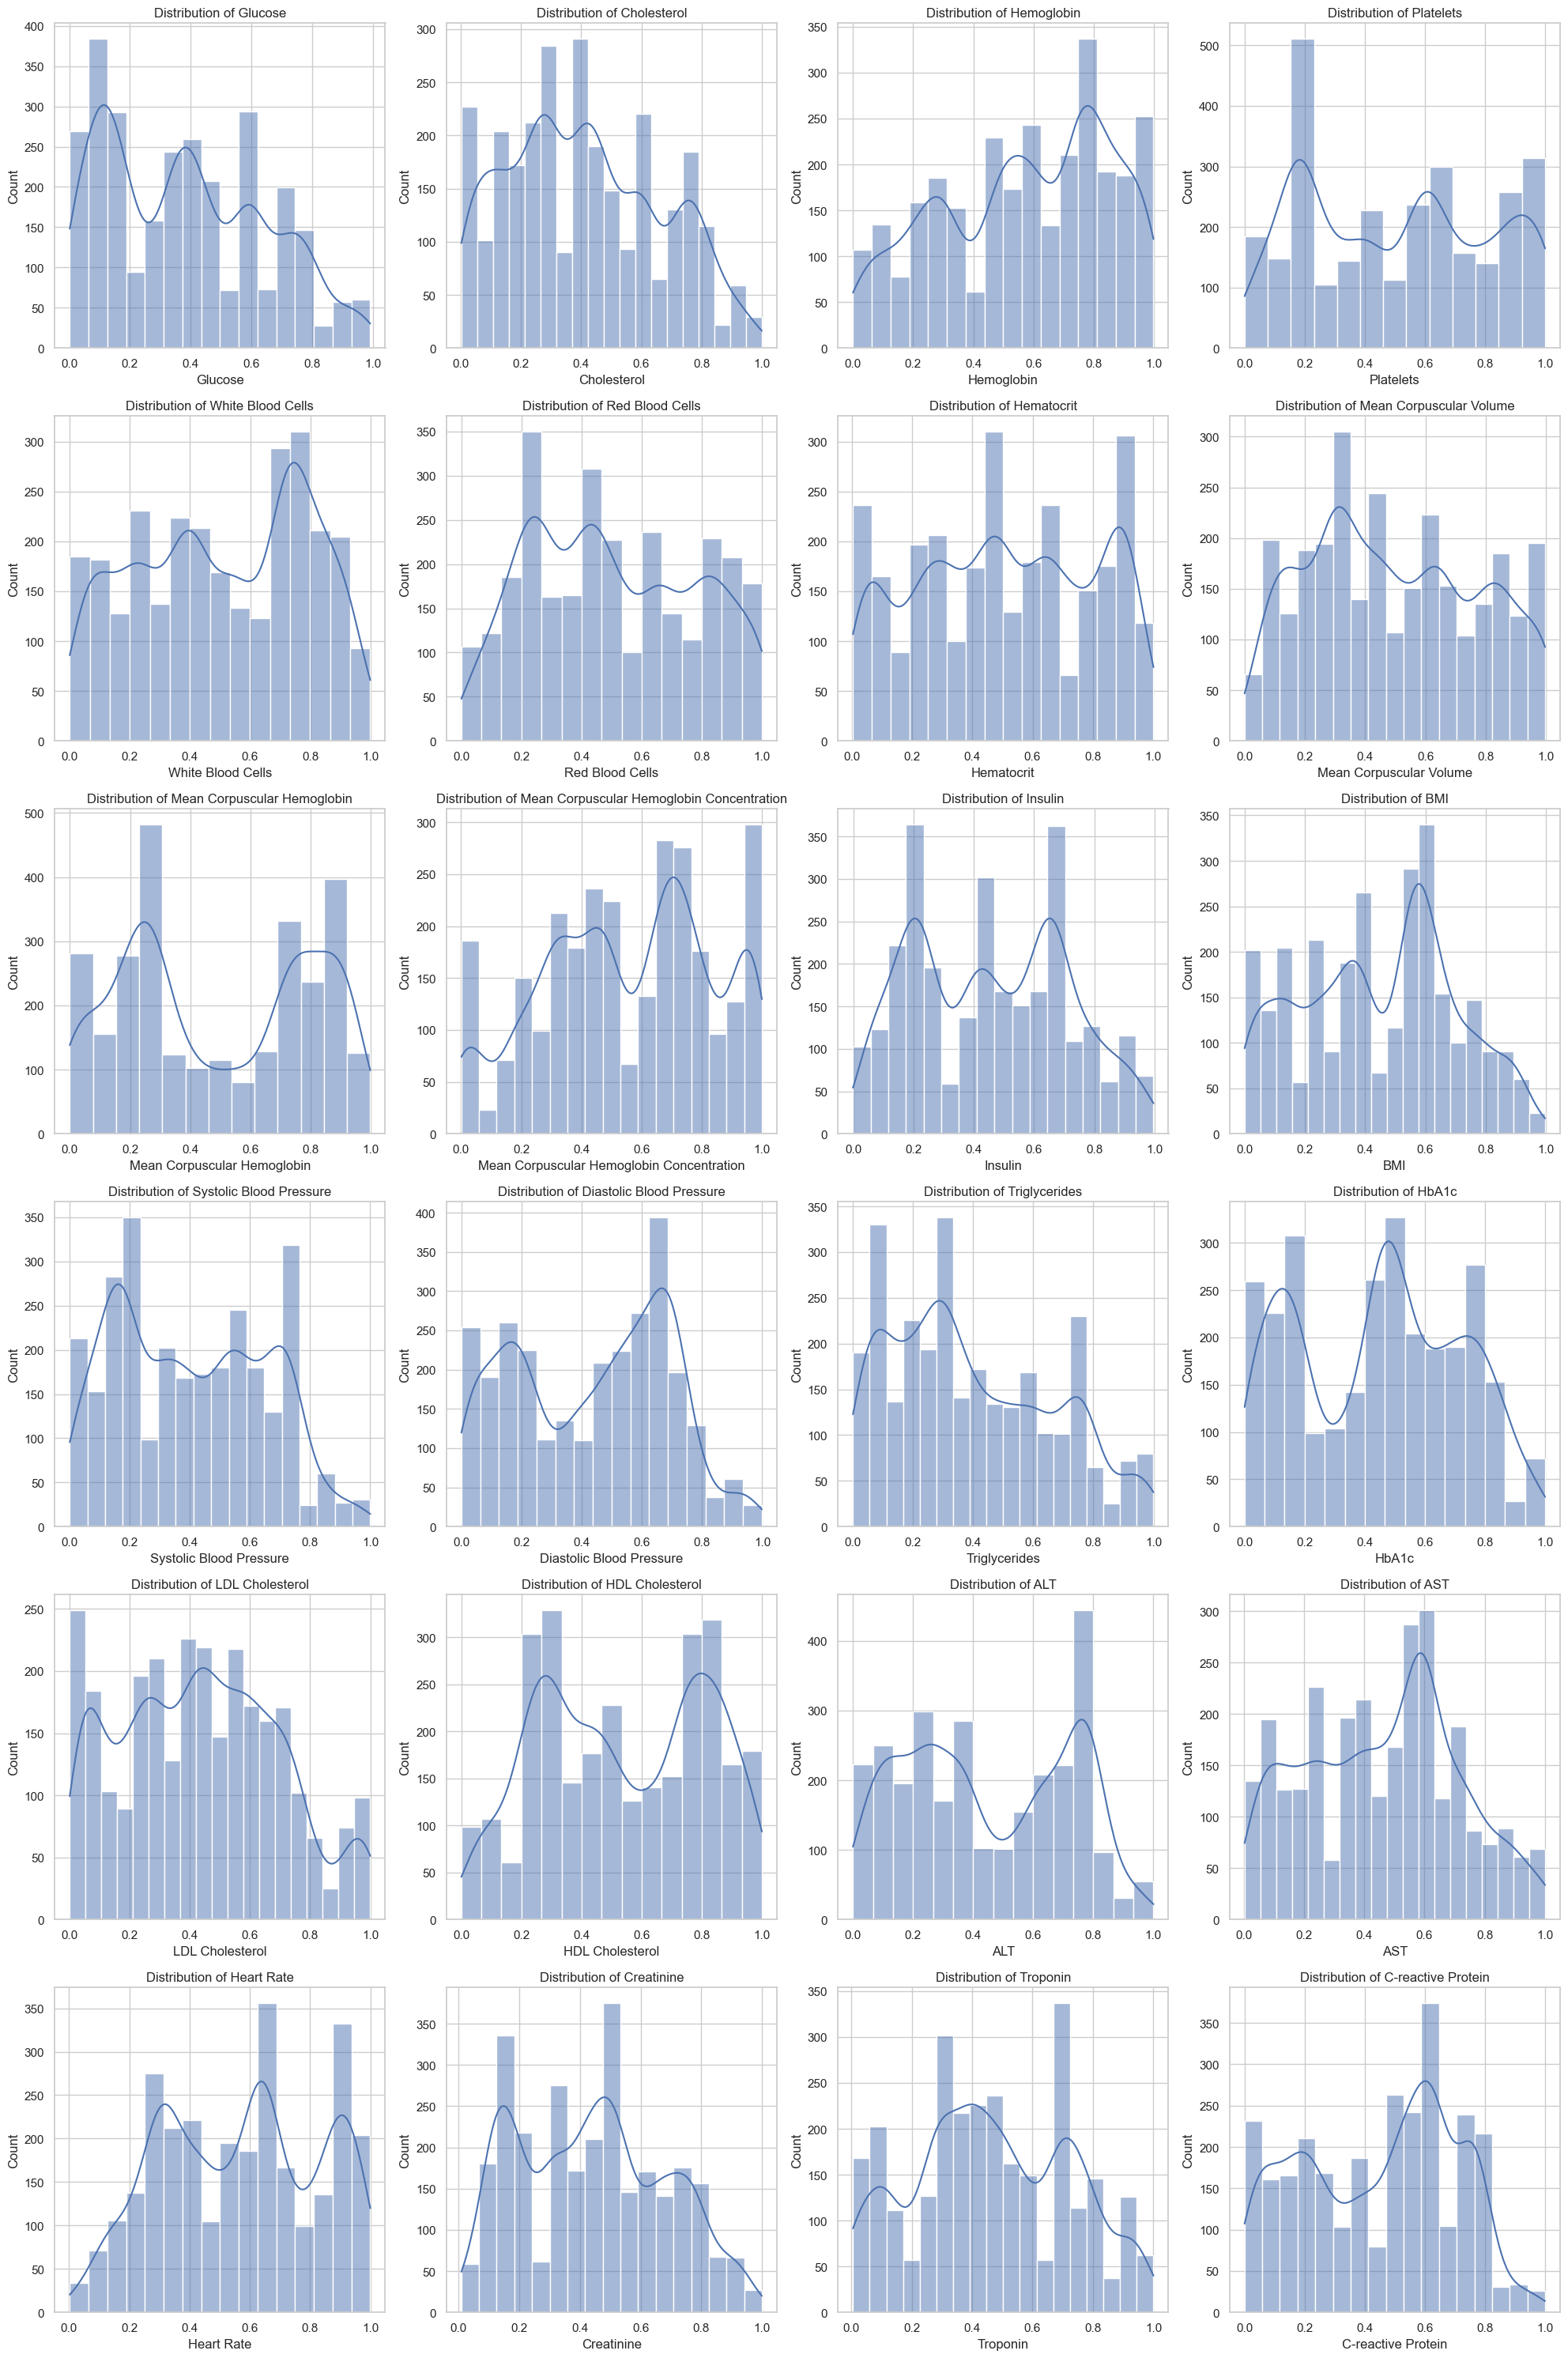

In [20]:
# Analyze data distributions of numerical features
plt.figure(figsize=(20, 30))
for i, column in enumerate(all_data.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(6, 4, i+1)
    sns.histplot(all_data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
plt.show()

In [21]:
# Check for skewness in numerical features
skewness = all_data.select_dtypes(include=['float64', 'int64']).skew().sort_values(ascending=False)
print("Skewness in features:")
print(skewness)

Skewness in features:
Triglycerides                                0.431247
Glucose                                      0.362153
Cholesterol                                  0.263200
LDL Cholesterol                              0.209112
Systolic Blood Pressure                      0.197235
Creatinine                                   0.194280
Mean Corpuscular Volume                      0.173812
Red Blood Cells                              0.159056
Insulin                                      0.111067
Platelets                                    0.084434
ALT                                          0.075551
Troponin                                     0.064802
Mean Corpuscular Hemoglobin                  0.028453
AST                                          0.020297
HbA1c                                       -0.000758
BMI                                         -0.022003
HDL Cholesterol                             -0.034471
Heart Rate                                  -0.054785
Hemato

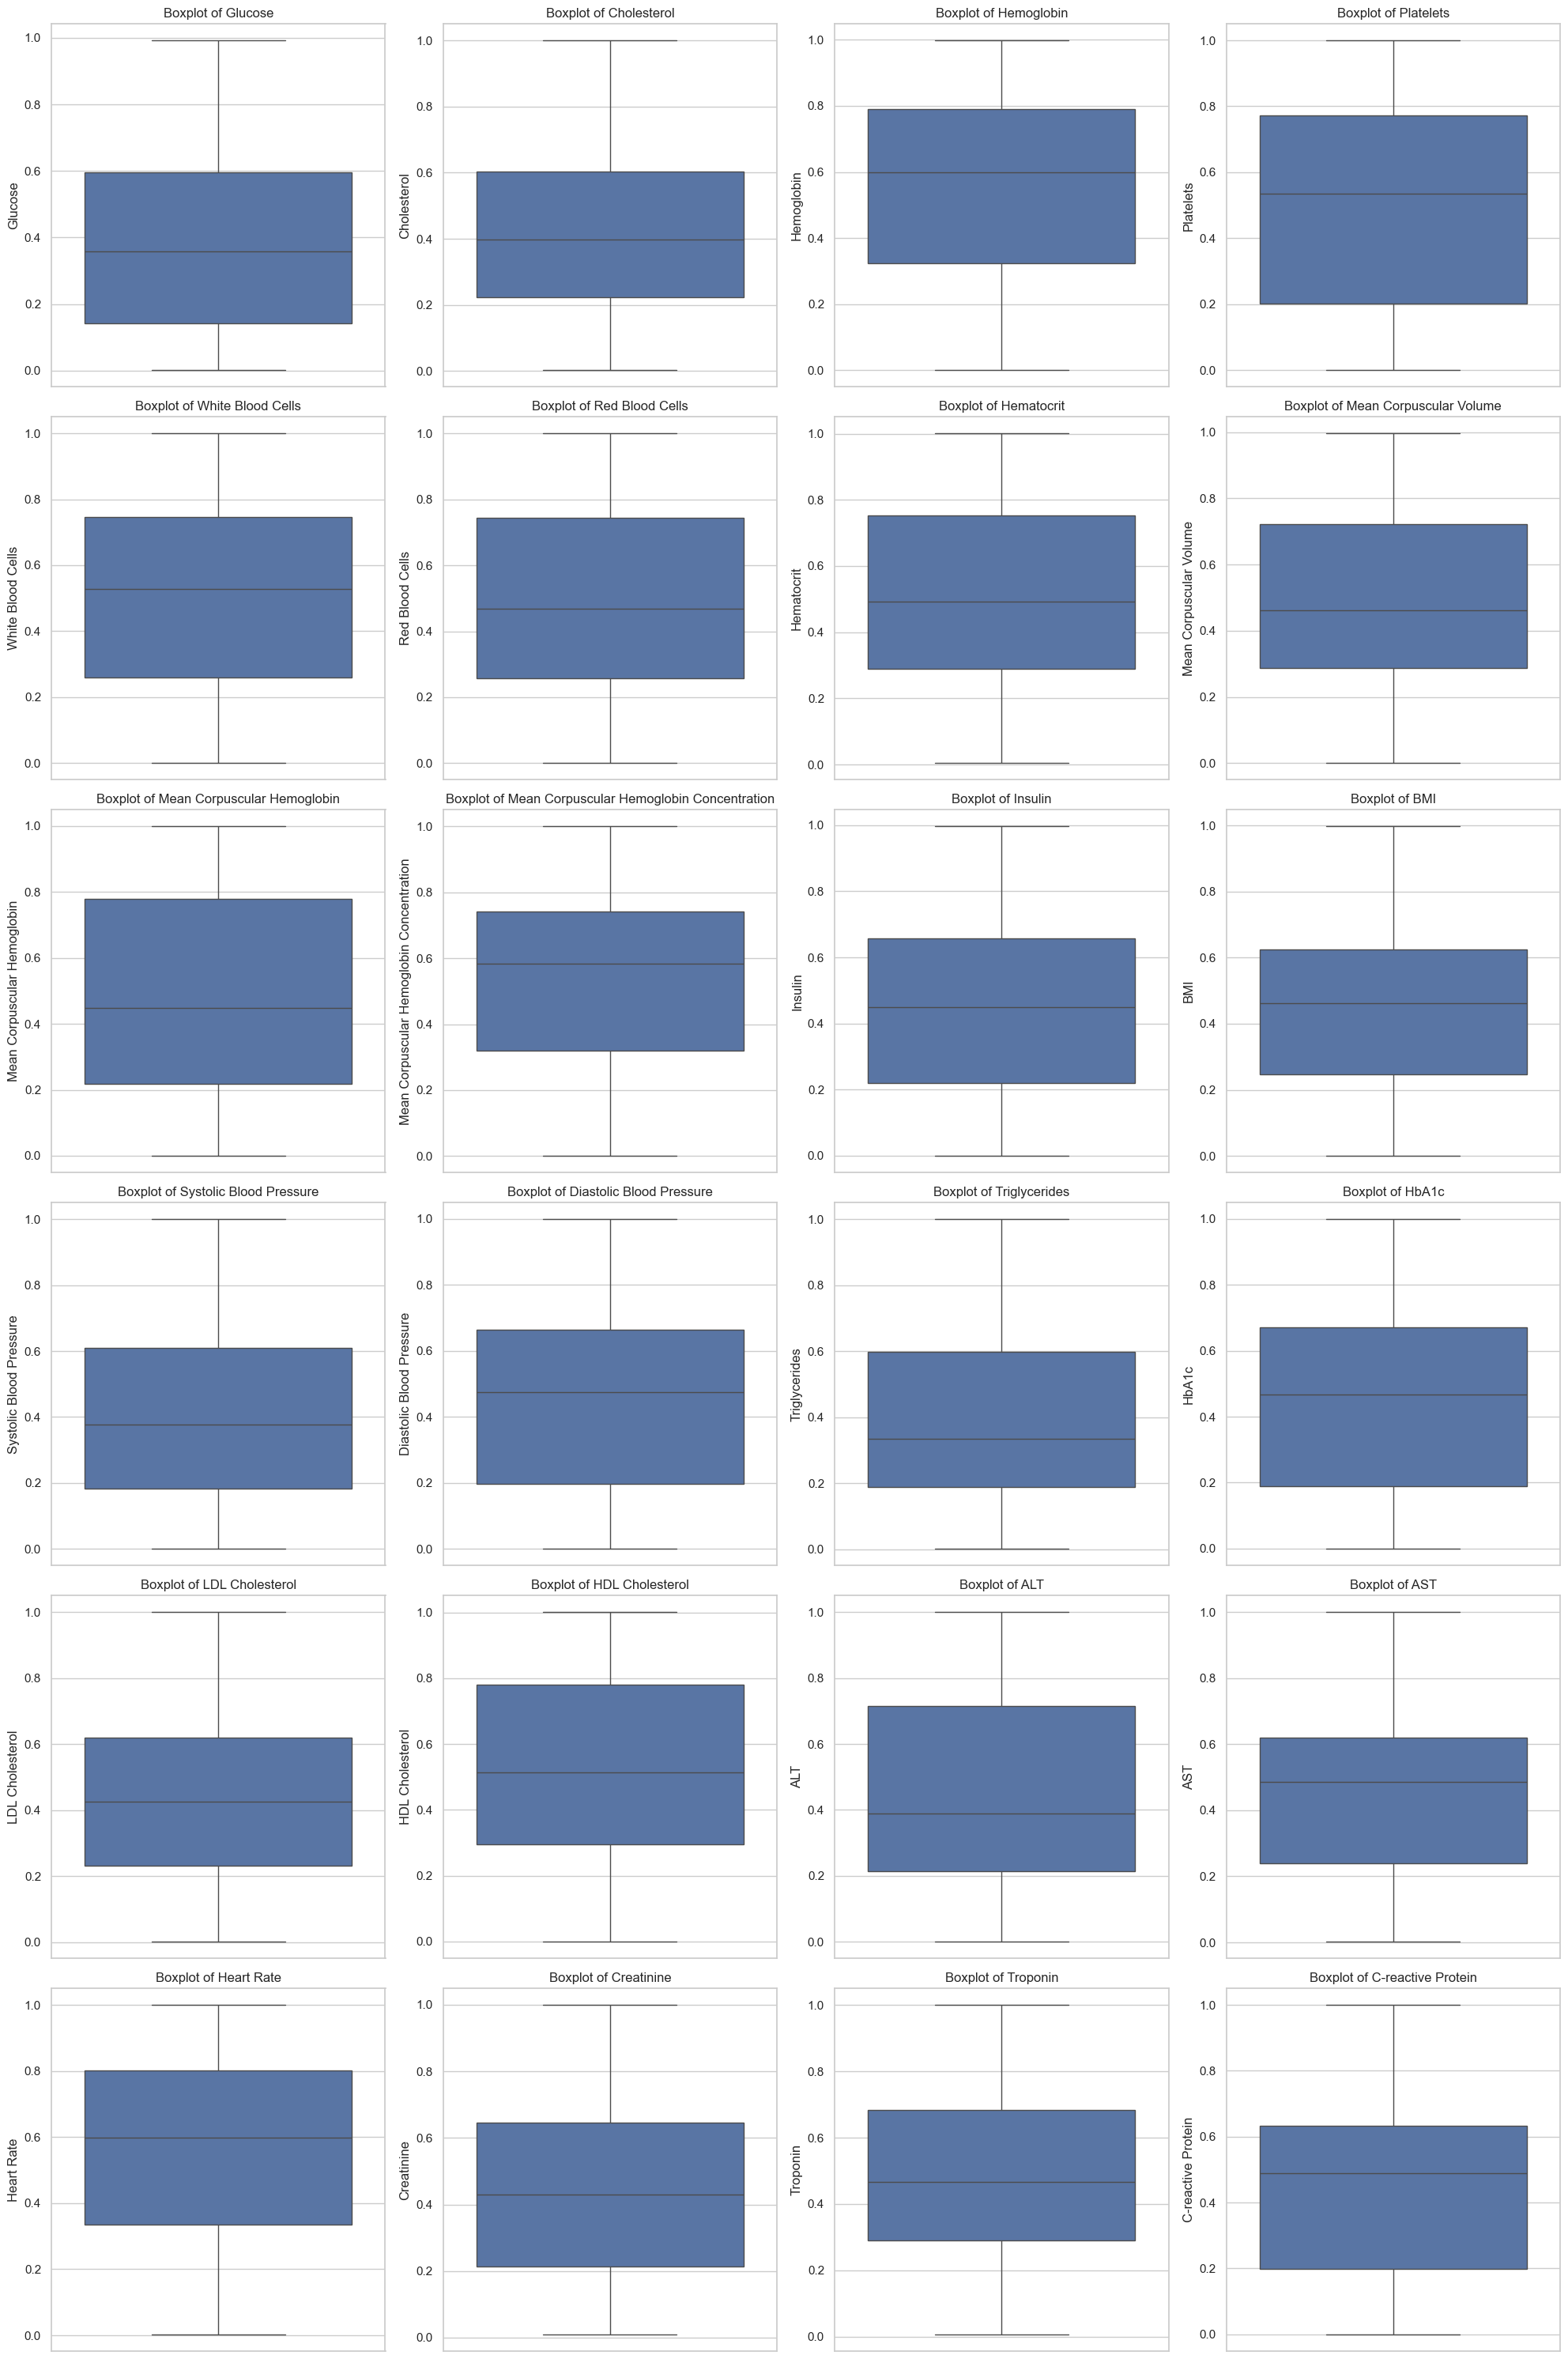

In [ ]:
# Visualize boxplots for outlier detection
plt.figure(figsize=(20, 30))
for i, column in enumerate(all_data.select_dtypes(include=['float64', 'int64']).columns):
    plt.subplot(6, 4, i+1)
    sns.boxplot(y=all_data[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()
plt.show()

# As the data are normalised, we can see that there are no outliers

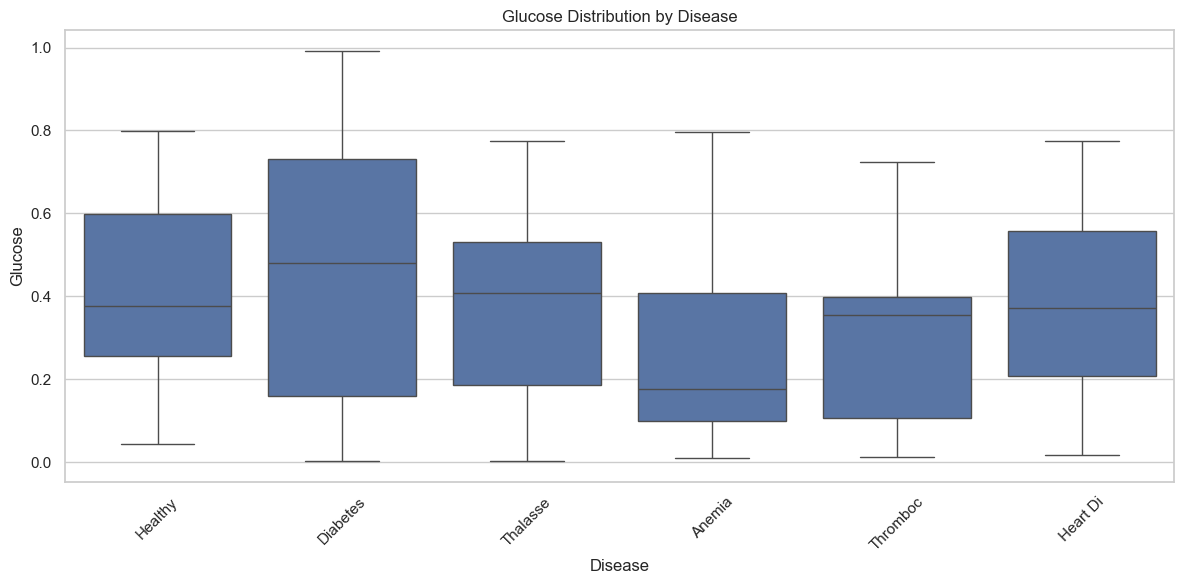

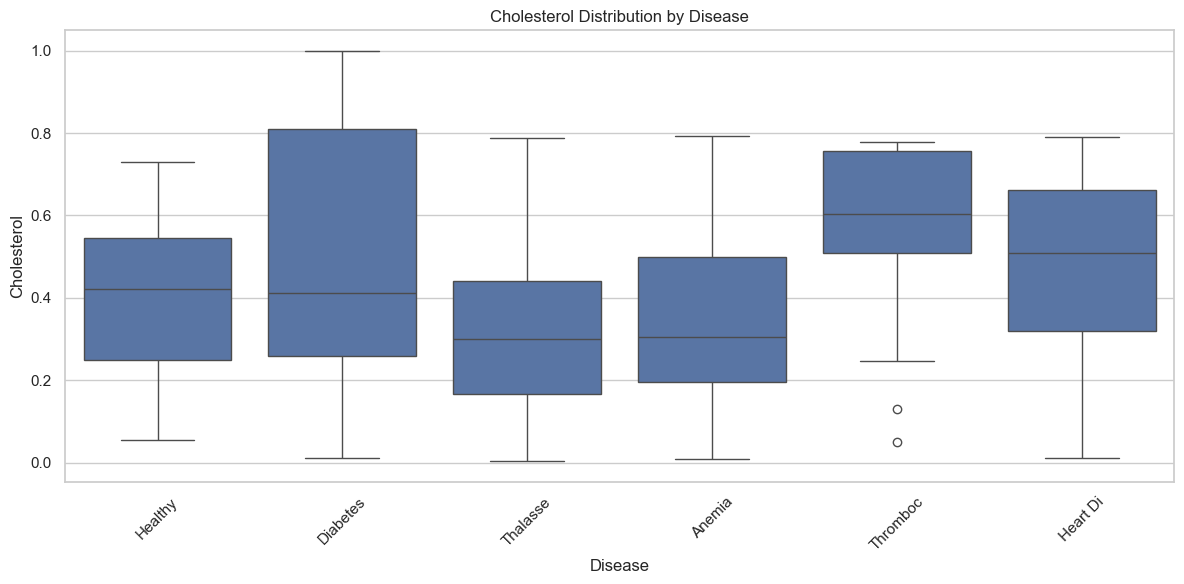

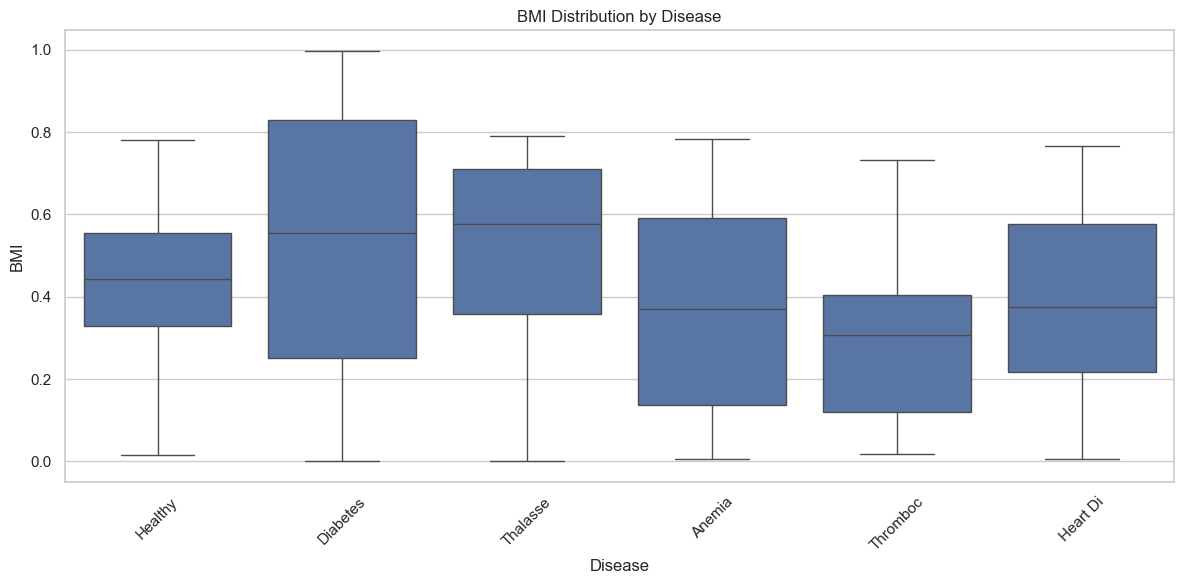

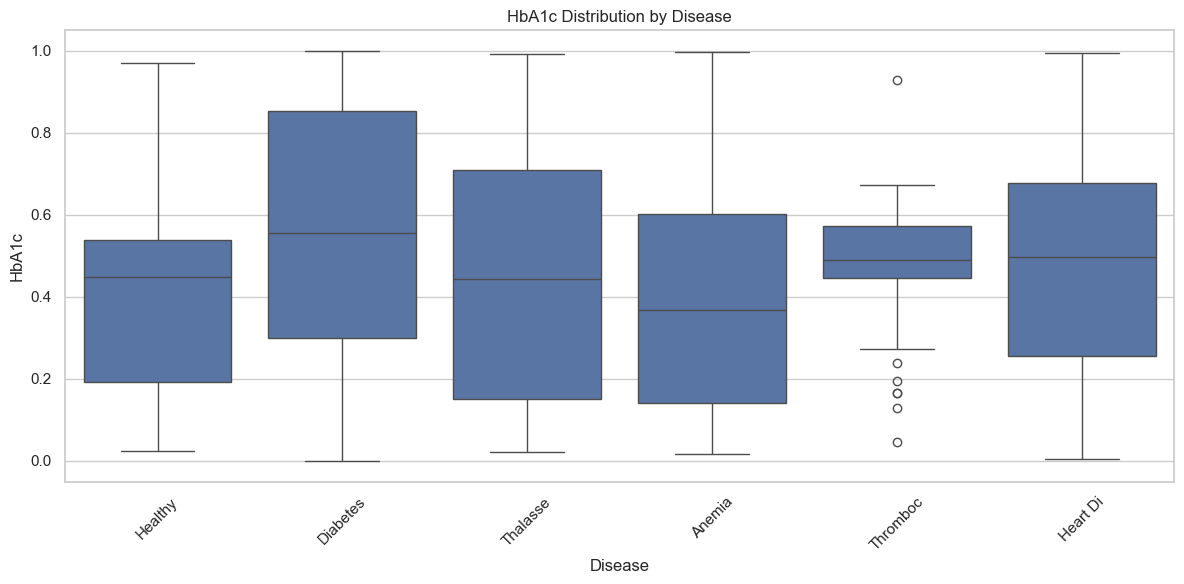

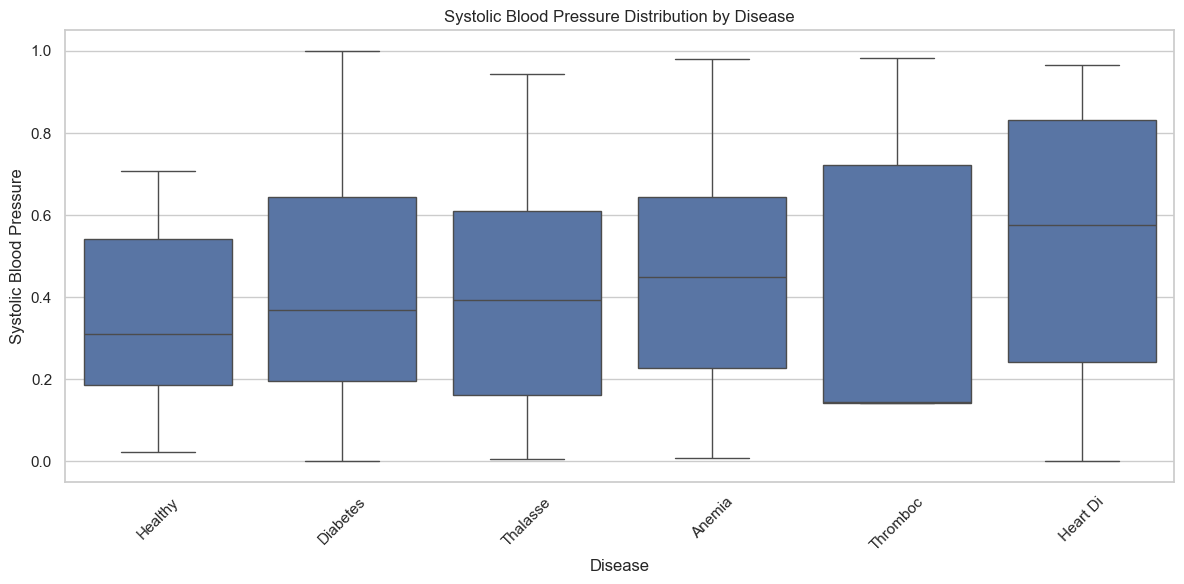

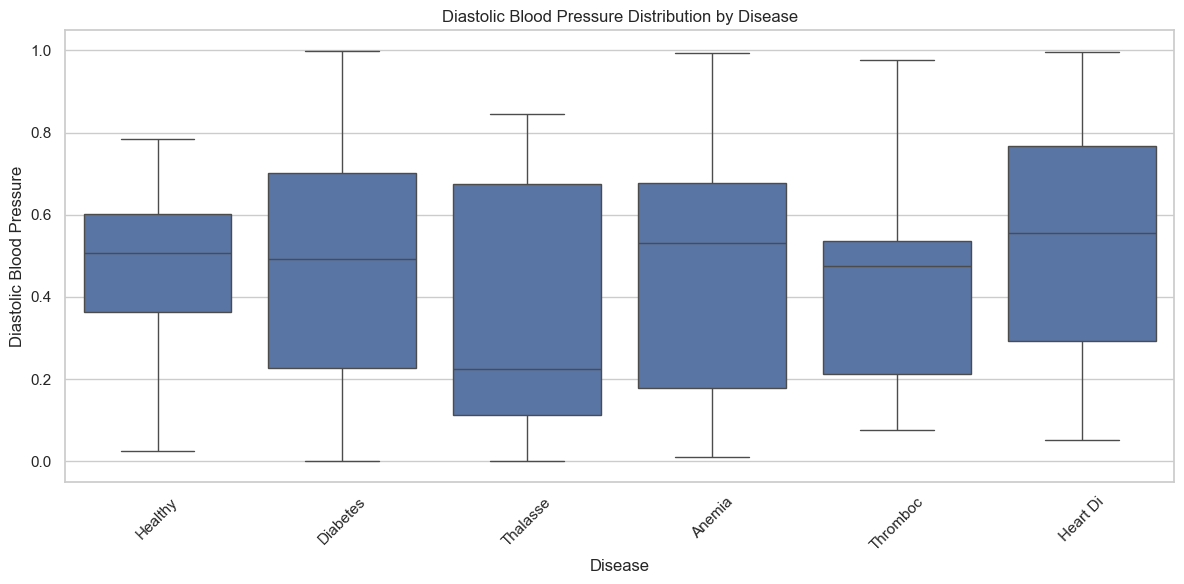

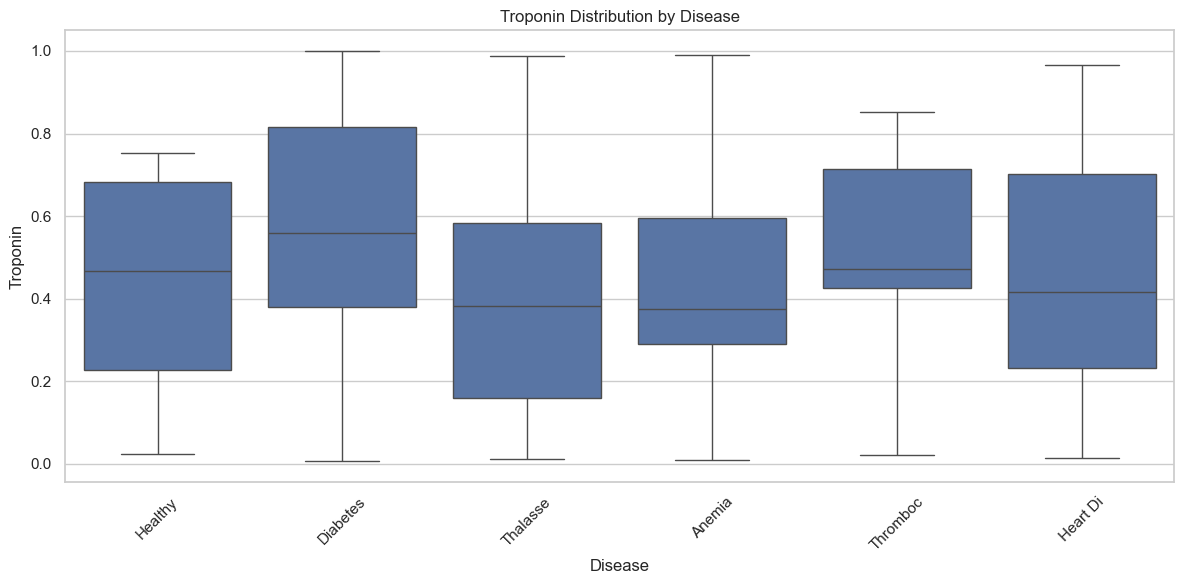

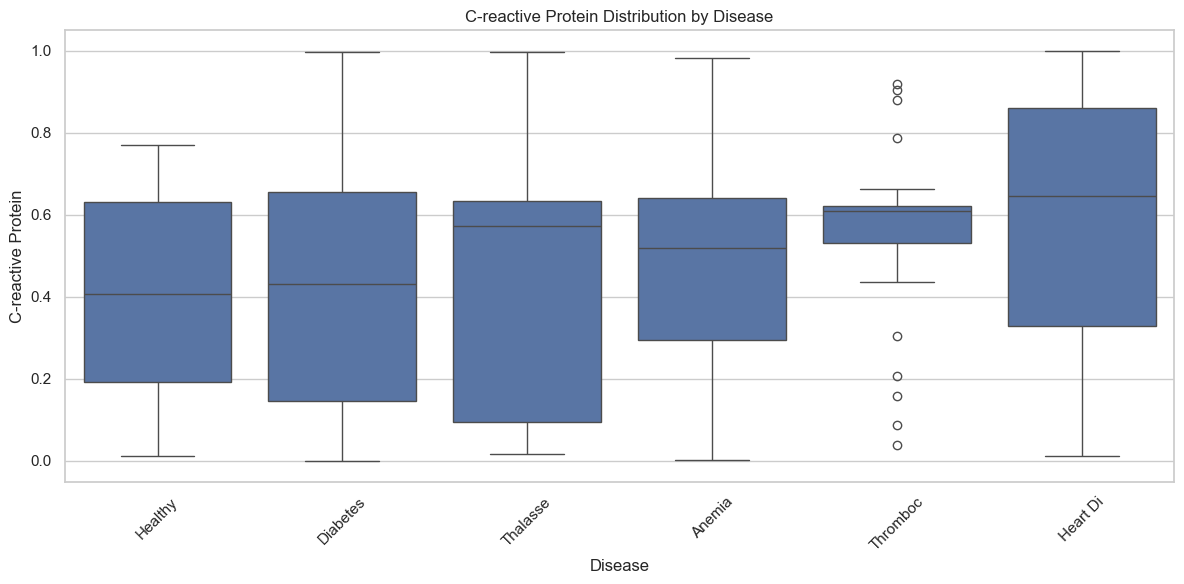

In [25]:
# Create a function to plot feature distributions by disease category
def plot_feature_by_disease(feature, data=all_data):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Disease', y=feature, data=data)
    plt.title(f'{feature} Distribution by Disease')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot distributions for key features
for feature in ['Glucose', 'Cholesterol', 'BMI', 'HbA1c', 'Systolic Blood Pressure', 
                'Diastolic Blood Pressure', 'Troponin', 'C-reactive Protein']:
    plot_feature_by_disease(feature)

In [ ]:
# Create interactive violin plots for key features
def interactive_violin(feature):
    fig = px.violin(all_data, y=feature, x="Disease", box=True, points="all",
                   color="Disease", title=f"{feature} Distribution by Disease")
    fig.update_layout(height=600, width=1000)
    return fig

# Display interactive visualizations
interactive_violin("Glucose").show()
interactive_violin("BMI").show()
interactive_violin("HbA1c").show()
interactive_violin("C-reactive Protein").show()

# not working at the moment. 

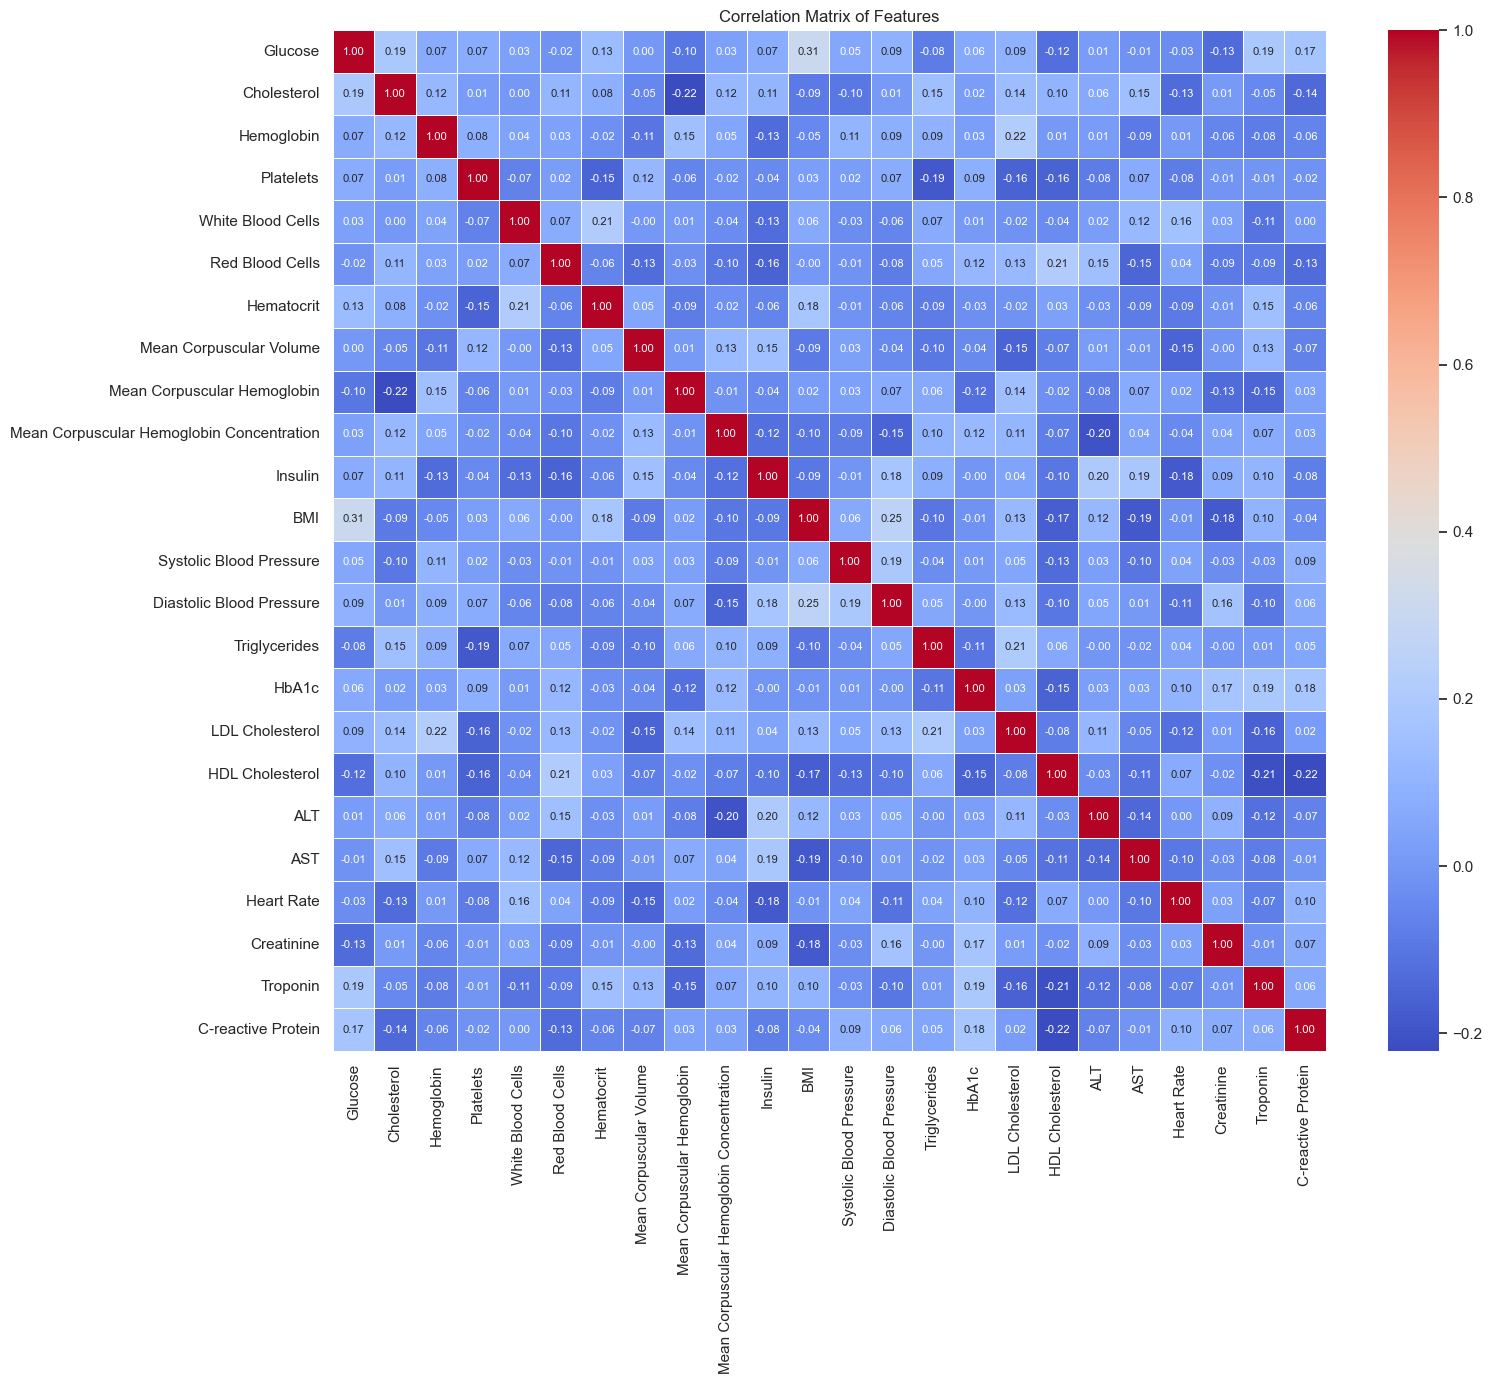

In [33]:
# Calculate correlation matrix
correlation_matrix = all_data.select_dtypes(include=['float64', 'int64']).corr()

# Plot heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", annot_kws={"size": 8})
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

In [37]:
# Identify highly correlated features (|correlation| > 0.8)
corr_pairs = []
for i, row in enumerate(correlation_matrix.values):
    for j, val in enumerate(row):
        if i != j and abs(val) > 0.25:
            corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], val))

if corr_pairs:
    print("Highly correlated features (|correlation| > 0.25):")
    for pair in corr_pairs:
        print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")

corr_pairs

Highly correlated features (|correlation| > 0.25):
Glucose and BMI: 0.31
BMI and Glucose: 0.31
BMI and Diastolic Blood Pressure: 0.25
Diastolic Blood Pressure and BMI: 0.25


[('Glucose', 'BMI', 0.30580209571810035),
 ('BMI', 'Glucose', 0.30580209571810035),
 ('BMI', 'Diastolic Blood Pressure', 0.25468961445625937),
 ('Diastolic Blood Pressure', 'BMI', 0.25468961445625937)]

## Stat part

In [49]:
# Prepare data for feature importance
X = all_data.drop('Disease', axis=1) # or all_data.iloc[:, :-1]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(all_data['Disease'])

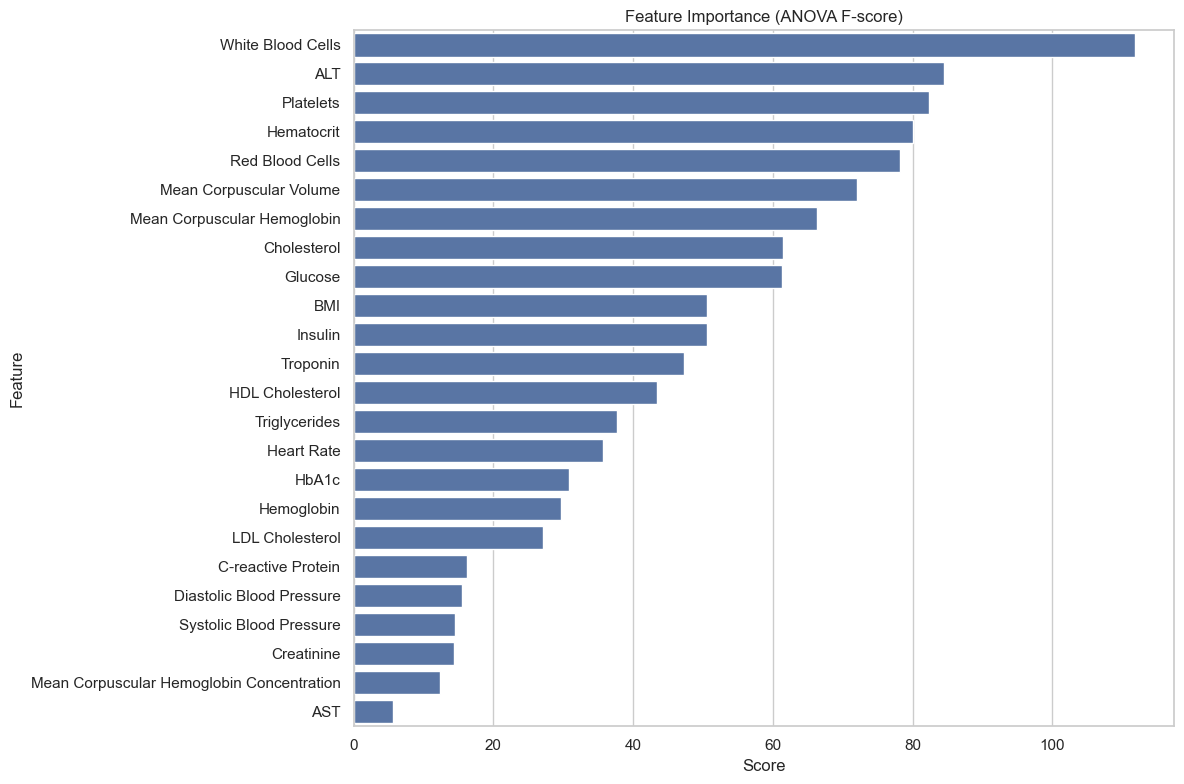

Feature importance ranking:
                                      Feature       Score        P-value
4                           White Blood Cells  111.837507  4.176726e-108
18                                        ALT   84.566770   5.038199e-83
3                                   Platelets   82.296051   6.849854e-81
6                                  Hematocrit   80.041344   9.141614e-79
5                             Red Blood Cells   78.184642   5.205164e-77
7                     Mean Corpuscular Volume   72.006502   3.906259e-71
8                 Mean Corpuscular Hemoglobin   66.372515   9.902072e-66
1                                 Cholesterol   61.403848   6.283226e-61
0                                     Glucose   61.308702   7.771079e-61
11                                        BMI   50.549986   2.559806e-50
10                                    Insulin   50.532972   2.660516e-50
22                                   Troponin   47.246704   4.671177e-47
17                     

In [50]:
# Use SelectKBest with f_classif (ANOVA F-value) for feature importance
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Create feature importance DataFrame
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_,
    'P-value': selector.pvalues_
})

# Sort by importance score
feature_scores = feature_scores.sort_values('Score', ascending=False)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Score', y='Feature', data=feature_scores)
plt.title('Feature Importance (ANOVA F-score)')
plt.tight_layout()
plt.show()

print("Feature importance ranking:")
print(feature_scores)

Important diff between AST & ALT : AST is an enzyme found in various tissues. ALT is more specific to liver wich have a minor role in diabete for instance

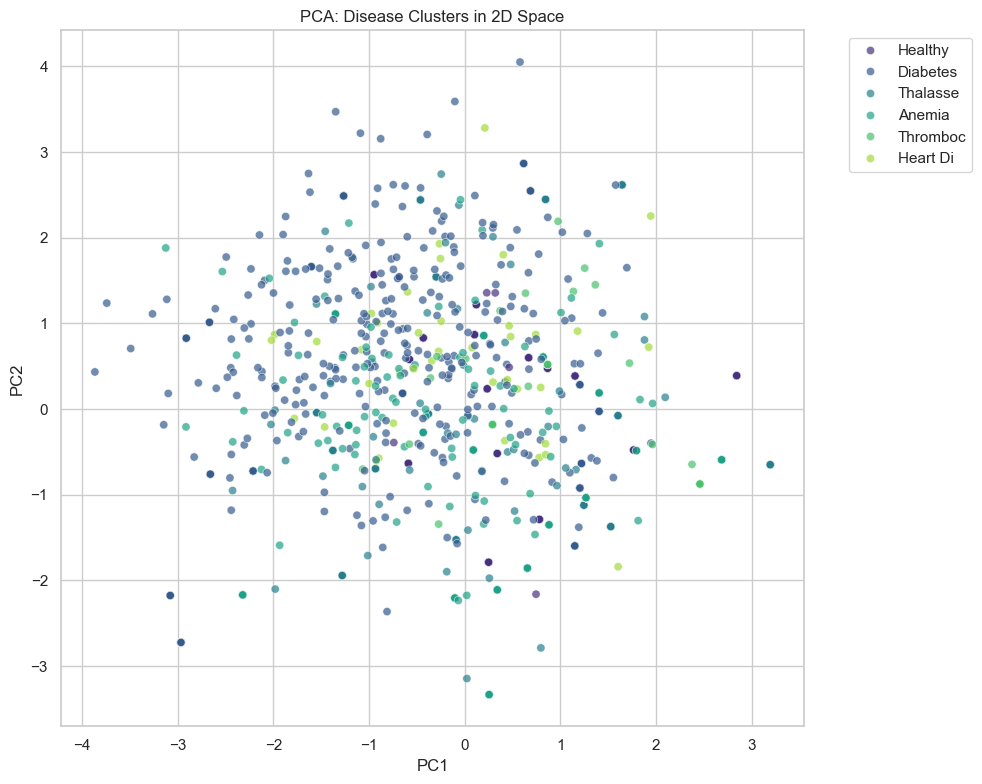

Explained variance ratio: [0.08232492 0.07718546]
Total explained variance: 0.1595

PCA Loadings (Feature Contributions to Principal Components):
                                                PC1       PC2
Glucose                                   -0.320963  0.284674
Cholesterol                                0.067402  0.093810
Hemoglobin                                 0.139588  0.278168
Platelets                                 -0.203460 -0.071830
White Blood Cells                          0.094728  0.052175
Red Blood Cells                            0.295509  0.170621
Hematocrit                                -0.103127  0.067123
Mean Corpuscular Volume                   -0.219939 -0.237306
Mean Corpuscular Hemoglobin                0.138262  0.101738
Mean Corpuscular Hemoglobin Concentration -0.042682 -0.158613
Insulin                                   -0.205840 -0.006954
BMI                                       -0.225774  0.415964
Systolic Blood Pressure                   -0.118

In [51]:
## 11. Dimensionality Reduction with PCA for Visualization

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create PCA DataFrame
pca_df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'Disease': all_data['Disease']
})

# Plot PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Disease', data=pca_df, palette='viridis', alpha=0.7)
plt.title('PCA: Disease Clusters in 2D Space')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Explained variance
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_):.4f}")

# Feature loadings
loadings = pd.DataFrame(
    pca.components_.T, 
    columns=['PC1', 'PC2'], 
    index=X.columns
)
print("\nPCA Loadings (Feature Contributions to Principal Components):")
print(loadings)

How interpret this value : (math part https://medium.com/analytics-vidhya/understanding-principle-component-analysis-pca-step-by-step-e7a4bb4031d9#:~:text=Steps%20Involved%20in%20the%20PCA,eigenvalues%20and%20their%20corresponding%20eigenvectors.)
1. Explained Variance Ratio & Total Explained Variance 
Explained variance ratio:
PC1 explains 8.23% of the total variance.
PC2 explains 7.72% of the total variance.
Total explained variance (PC1 + PC2):
Together, the first two components explain 15.95% of the total variance.
This means that a large portion of the dataset’s variance is still spread across additional components, and you may need more components to capture a significant amount of variation in the data.
2. PCA Loadings (Feature Contributions)
Each value in the table represents how much a given feature contributes to each principal component (PC1 or PC2). Larger absolute values indicate stronger influence.

PC1 (First Principal Component)
The most influential features are:
HDL Cholesterol (+0.435) → Strong positive contribution
Troponin (-0.383) → Strong negative contribution
Glucose (-0.321) → Moderate negative contribution
Red Blood Cells (+0.296) → Moderate positive contribution
Interpretation:

PC1 likely captures a contrast between lipid metabolism (HDL, LDL, triglycerides) and cardiac/metabolic markers (Troponin, Glucose, HbA1c).
A high PC1 score could indicate better lipid profile but worse metabolic profile, and vice versa.
PC2 (Second Principal Component)
The most influential features are:
LDL Cholesterol (+0.430) → Strong positive contribution
BMI (+0.416) → Strong positive contribution
Diastolic Blood Pressure (+0.355) → Moderate positive contribution
Interpretation:

PC2 might represent a mix of obesity-related and cardiovascular risk factors (BMI, LDL, Blood Pressure).
A high PC2 score might correspond to higher cardiovascular risk due to obesity and hypertension.

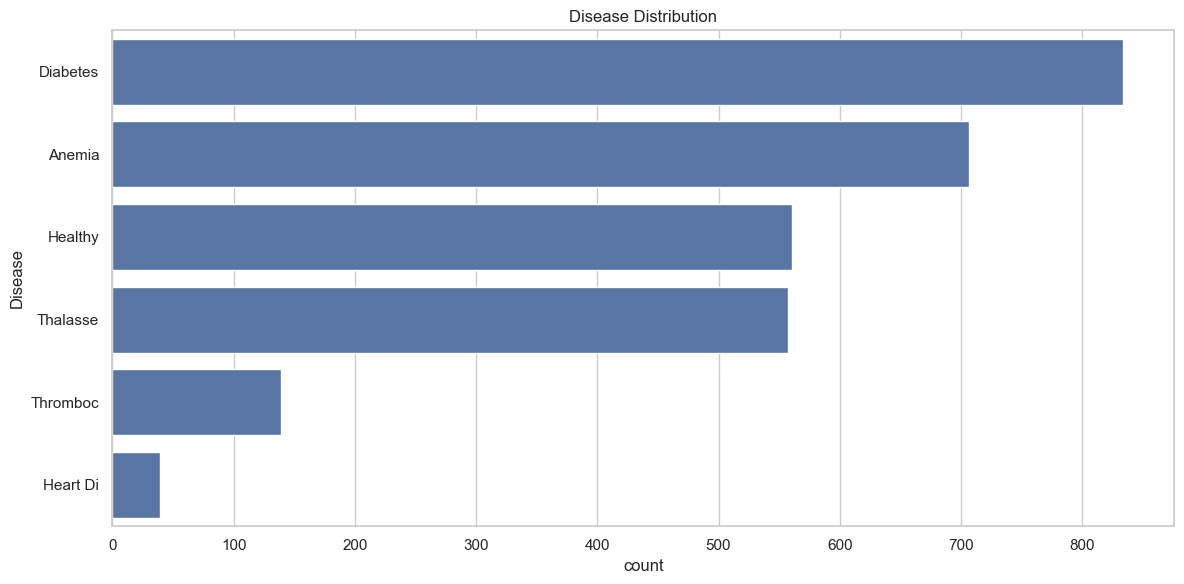

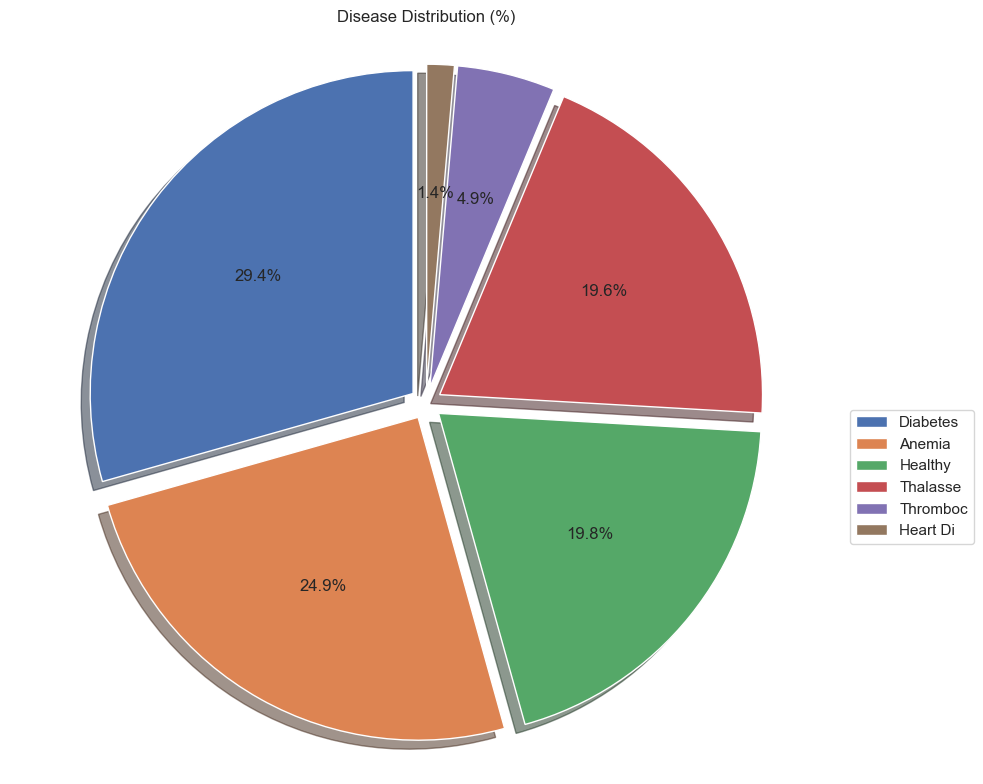

In [55]:
# Plot disease distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='Disease', data=all_data, order=all_data['Disease'].value_counts().index)
plt.title('Disease Distribution')
plt.tight_layout()
plt.show()

# Calculate percentage distribution
disease_percentage = all_data['Disease'].value_counts(normalize=True) * 100

# Create pie chart
plt.figure(figsize=(10, 8))
explode = [0.05] * len(disease_percentage)  # Adjust explode to provide more space
plt.pie(disease_percentage, labels=None, autopct='%1.1f%%', 
        startangle=90, shadow=True, explode=explode)
plt.title('Disease Distribution (%)')
plt.axis('equal')
plt.legend(labels=disease_percentage.index, loc='upper left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

# Check class imbalance
# print("Disease distribution (%):")
# for disease, percentage in disease_percentage.items():
#    print(f"{disease}: {percentage:.2f}%")

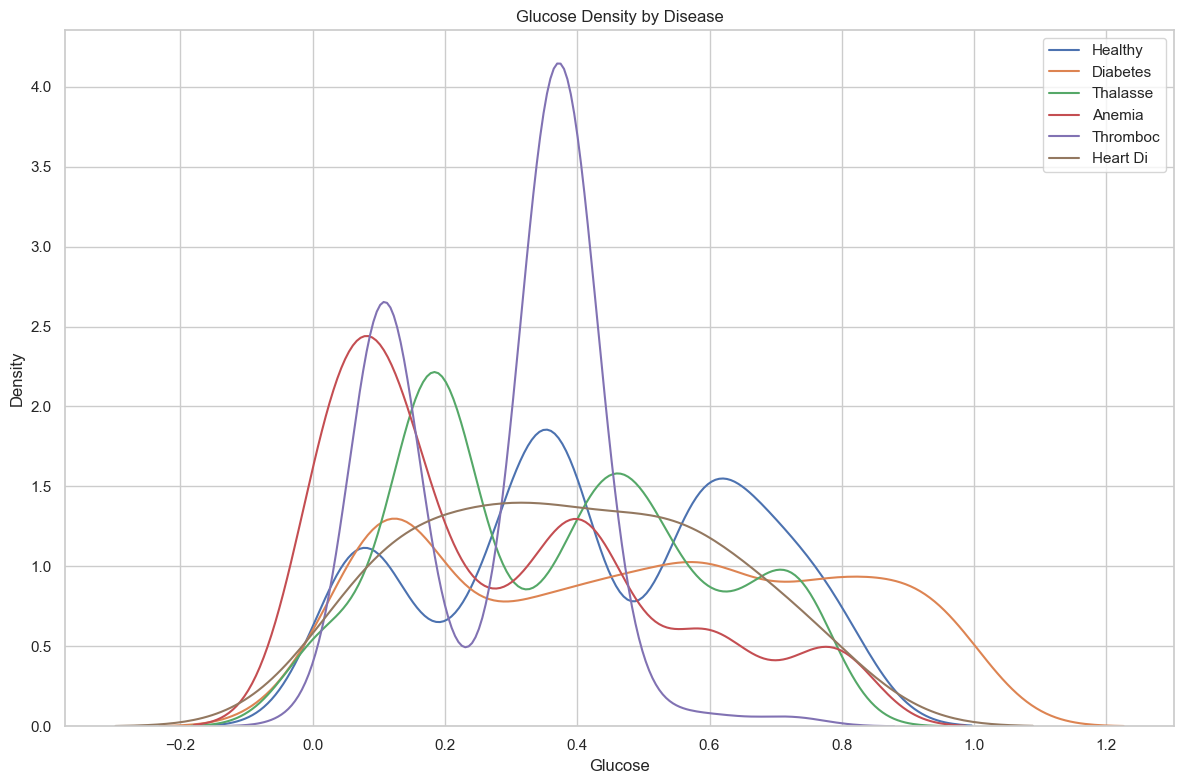

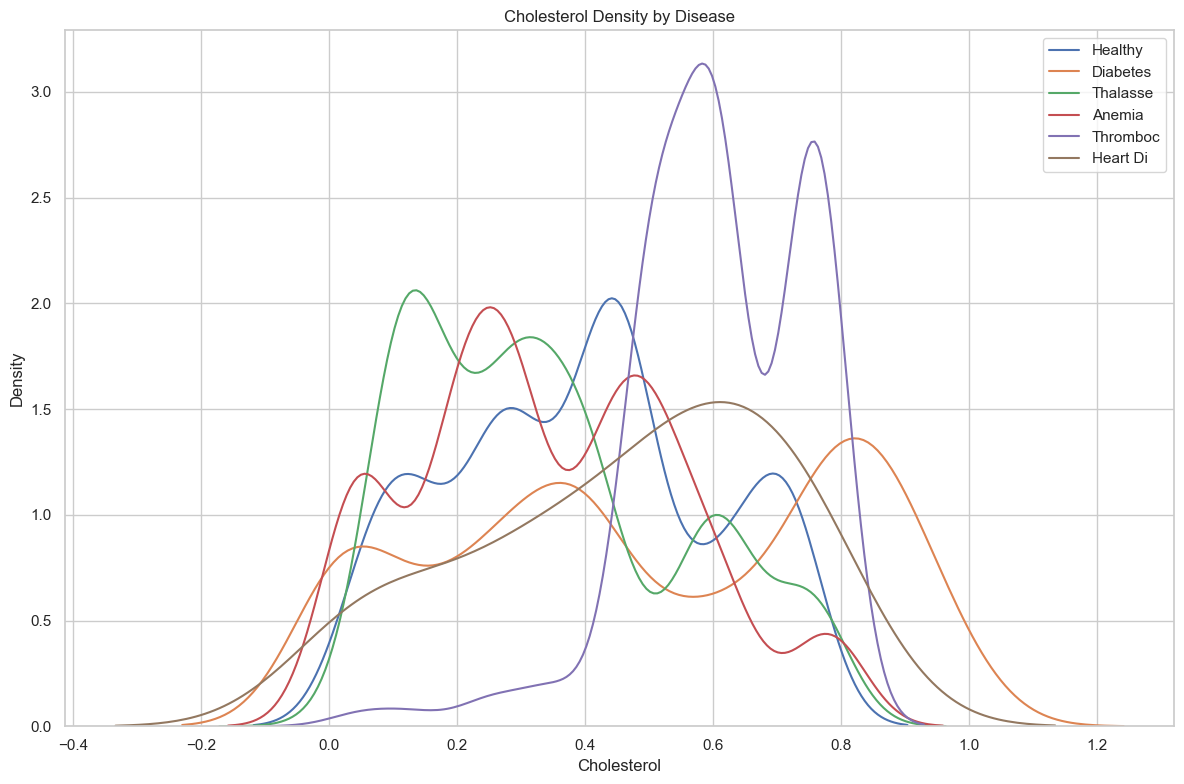

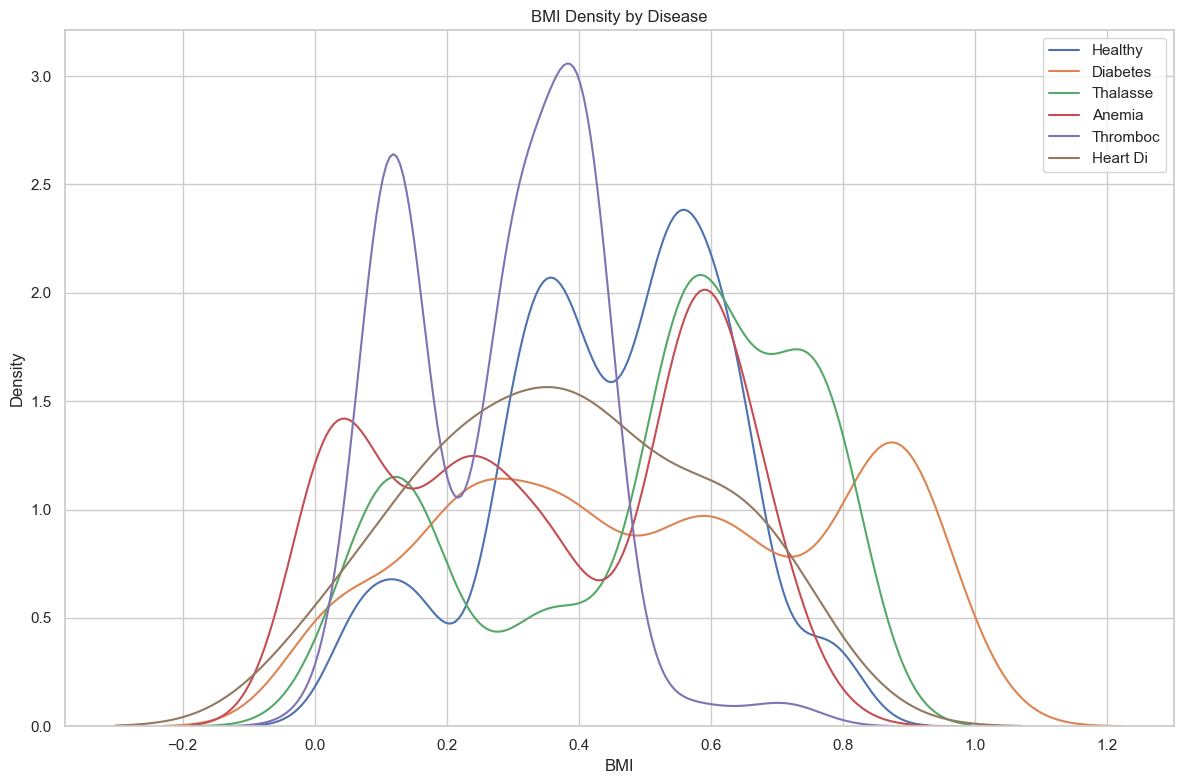

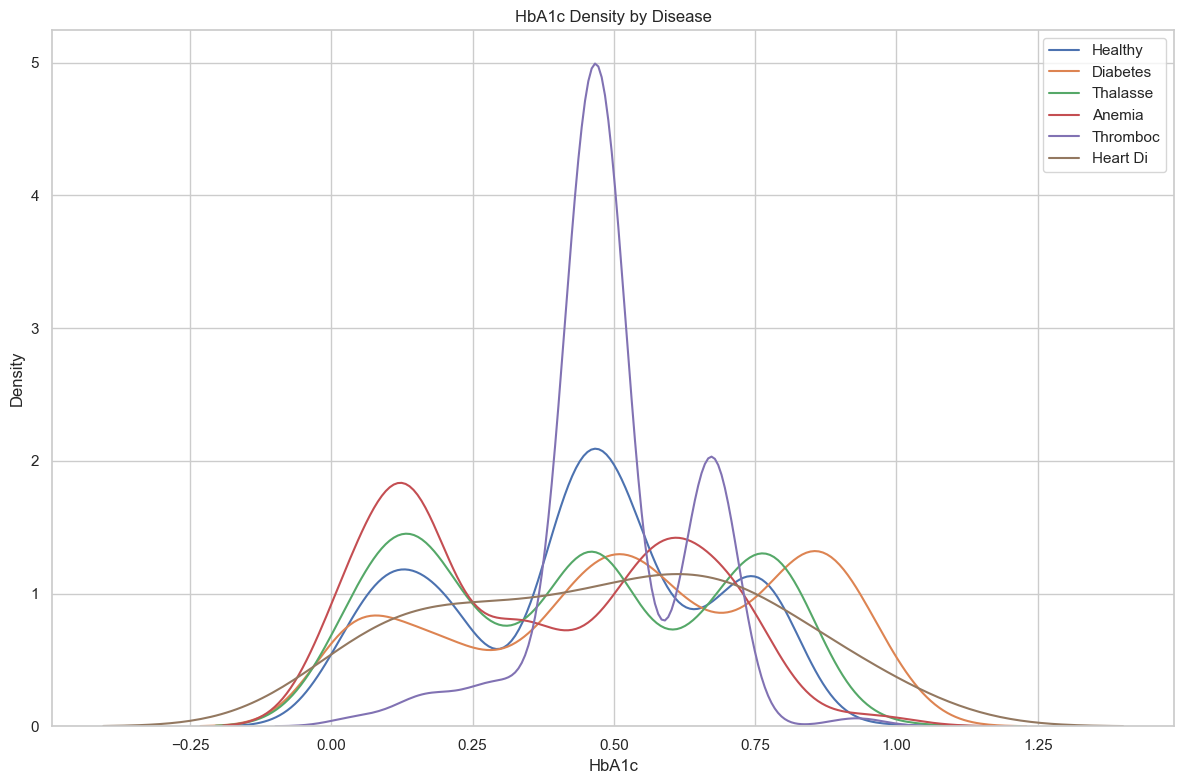

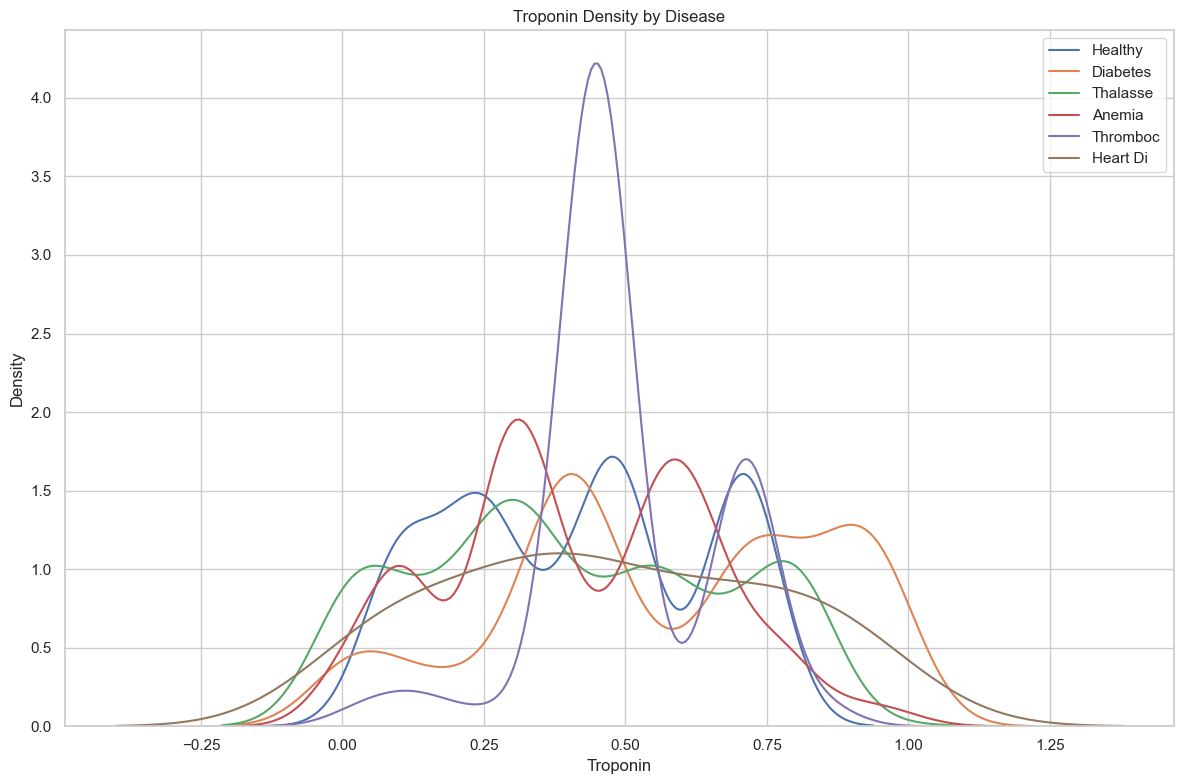

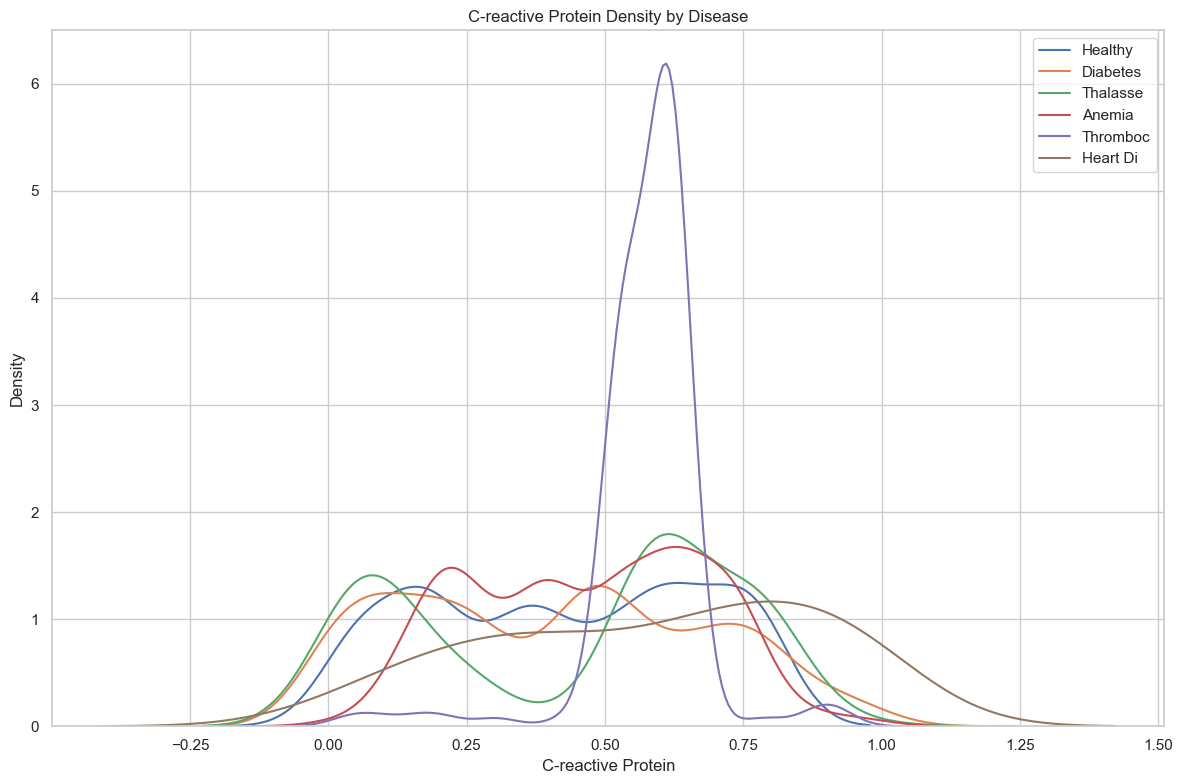

In [57]:
# Create a function to plot feature distributions for each disease
def plot_feature_density_by_disease(feature):
    plt.figure(figsize=(12, 8))
    for disease in all_data['Disease'].unique():
        subset = all_data[all_data['Disease'] == disease]
        sns.kdeplot(subset[feature], label=disease)
    
    plt.title(f'{feature} Density by Disease')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot key features
for feature in ['Glucose', 'Cholesterol', 'BMI', 'HbA1c', 'Troponin', 'C-reactive Protein']:
    plot_feature_density_by_disease(feature)


Seem like thromboc associated with every key features 

ANOVA results (comparing feature means across disease groups):
                                      Feature  F-statistic        p-value  \
4                           White Blood Cells   111.837507  4.176726e-108   
18                                        ALT    84.566770   5.038199e-83   
3                                   Platelets    82.296051   6.849854e-81   
6                                  Hematocrit    80.041344   9.141614e-79   
5                             Red Blood Cells    78.184642   5.205164e-77   
7                     Mean Corpuscular Volume    72.006502   3.906259e-71   
8                 Mean Corpuscular Hemoglobin    66.372515   9.902072e-66   
1                                 Cholesterol    61.403848   6.283226e-61   
0                                     Glucose    61.308702   7.771079e-61   
11                                        BMI    50.549986   2.559806e-50   
10                                    Insulin    50.532972   2.660516e-50   
22           

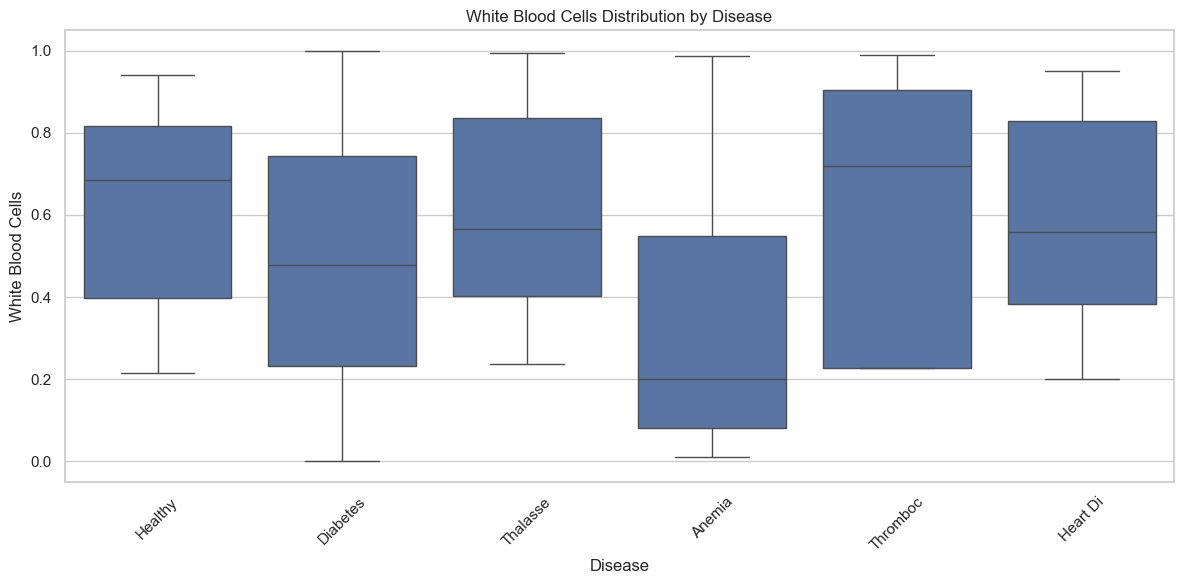

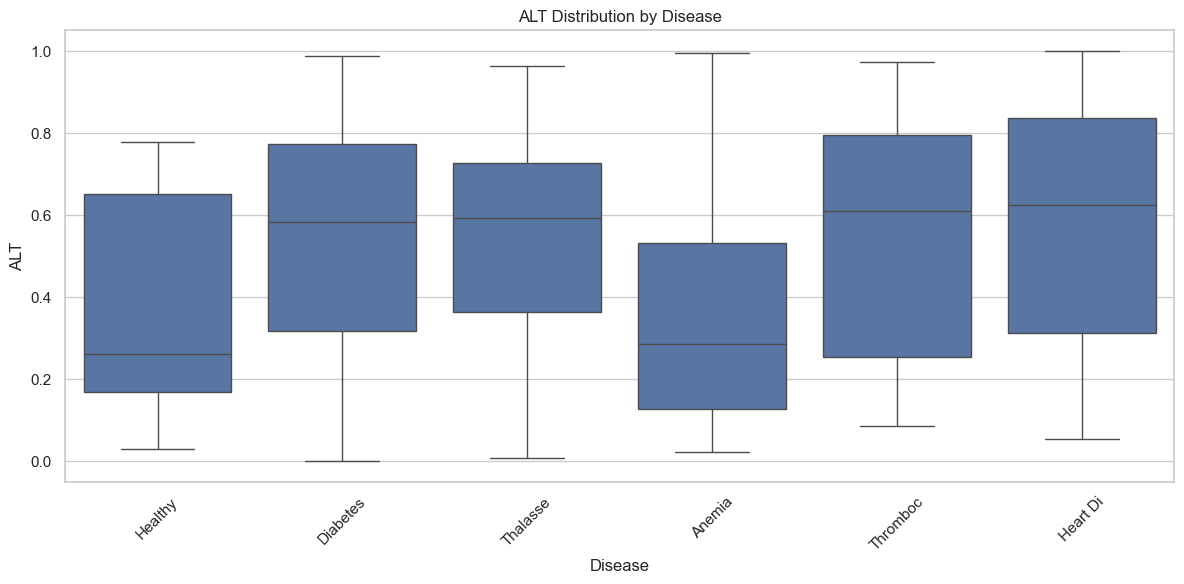

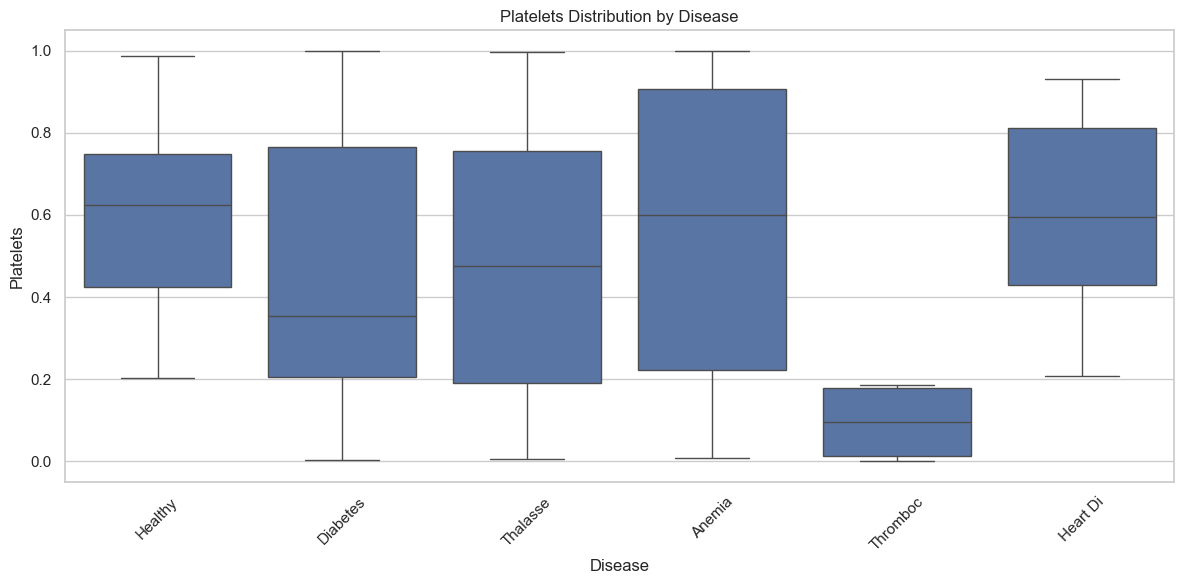

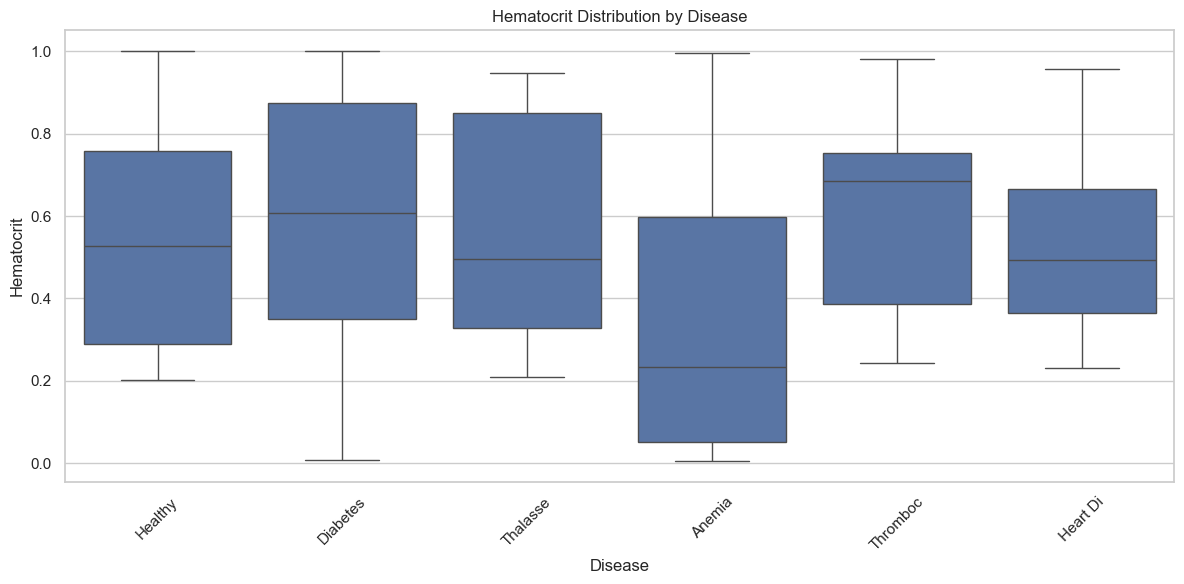

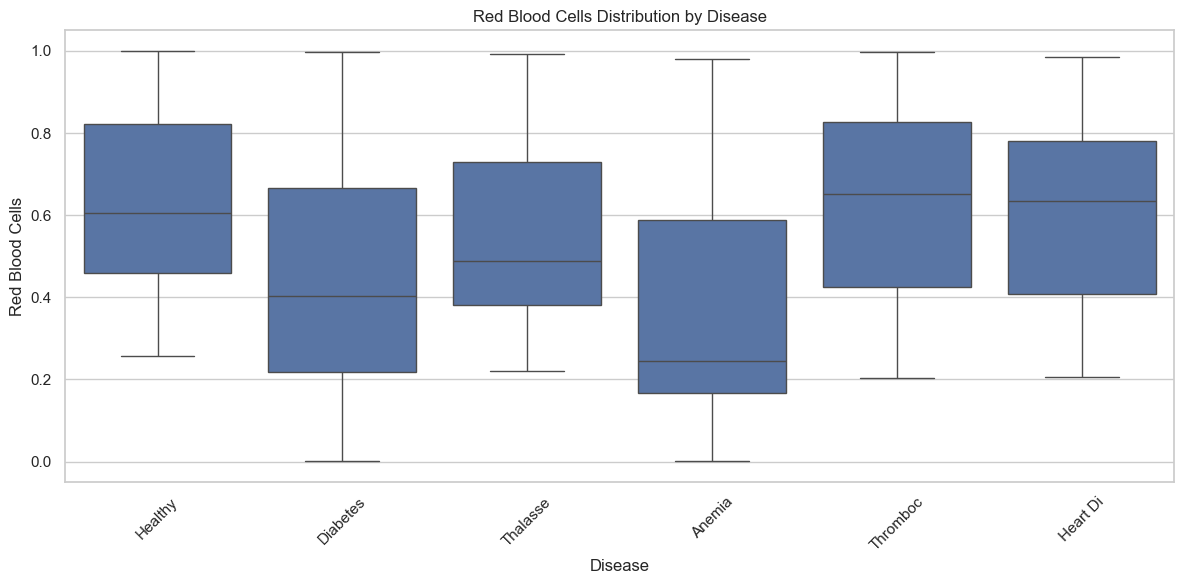

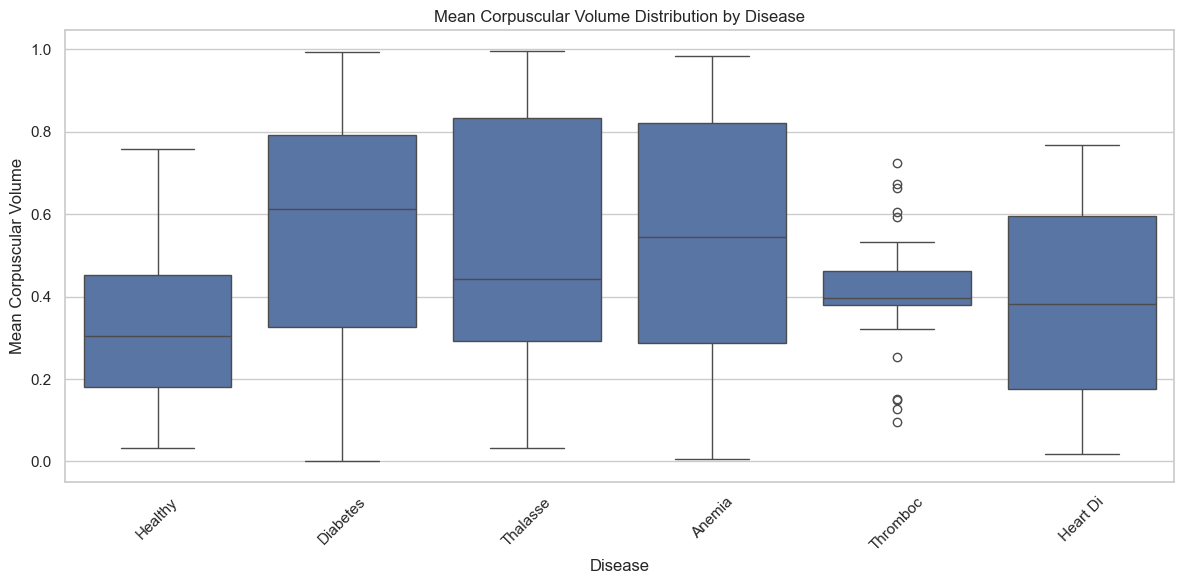

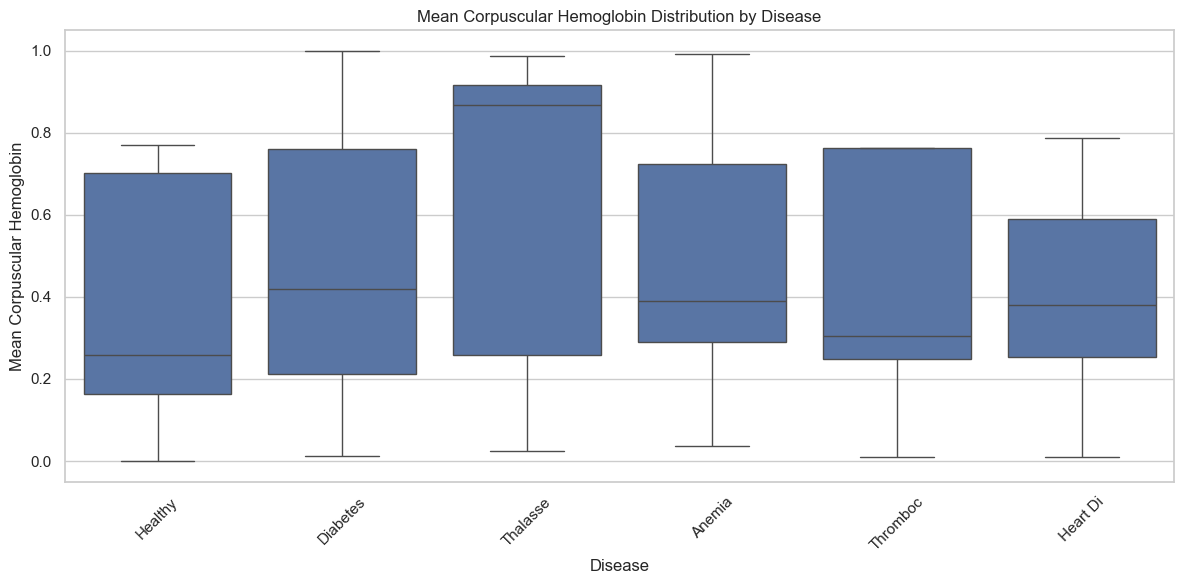

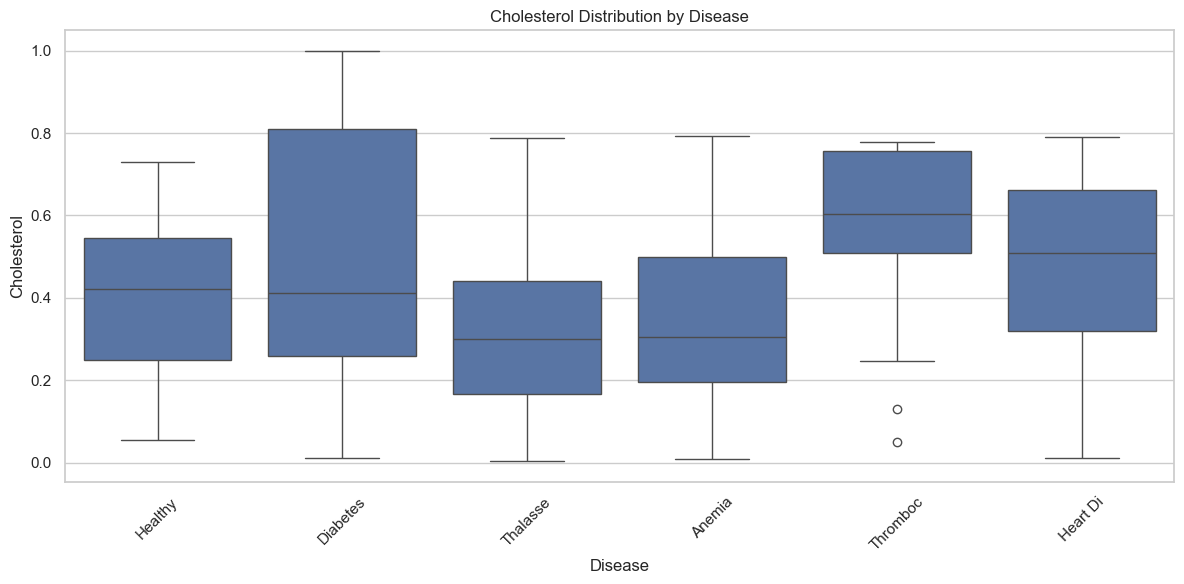

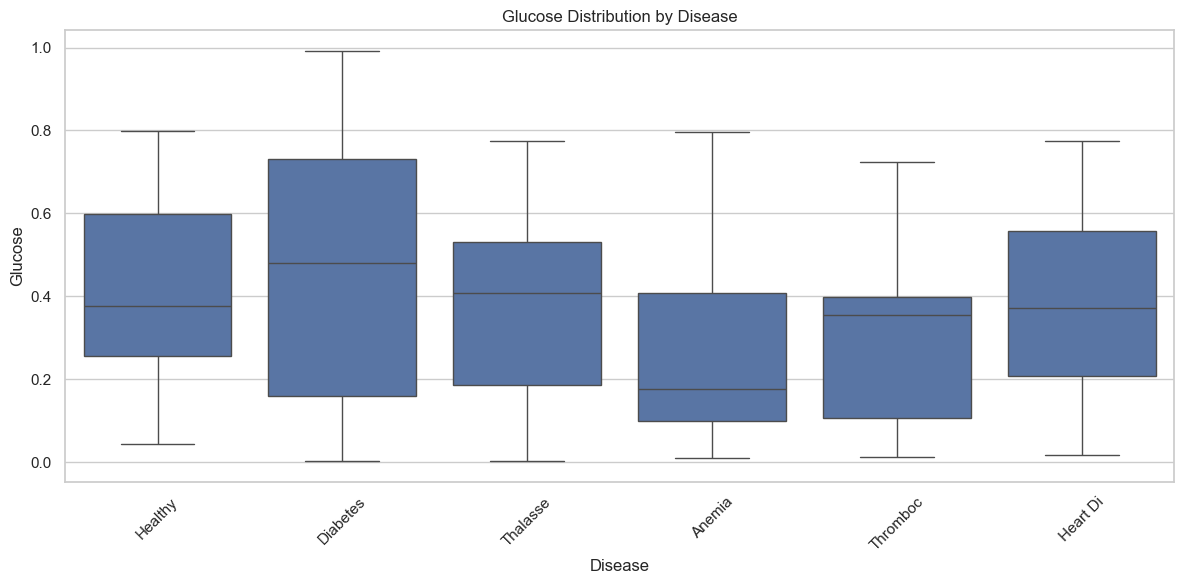

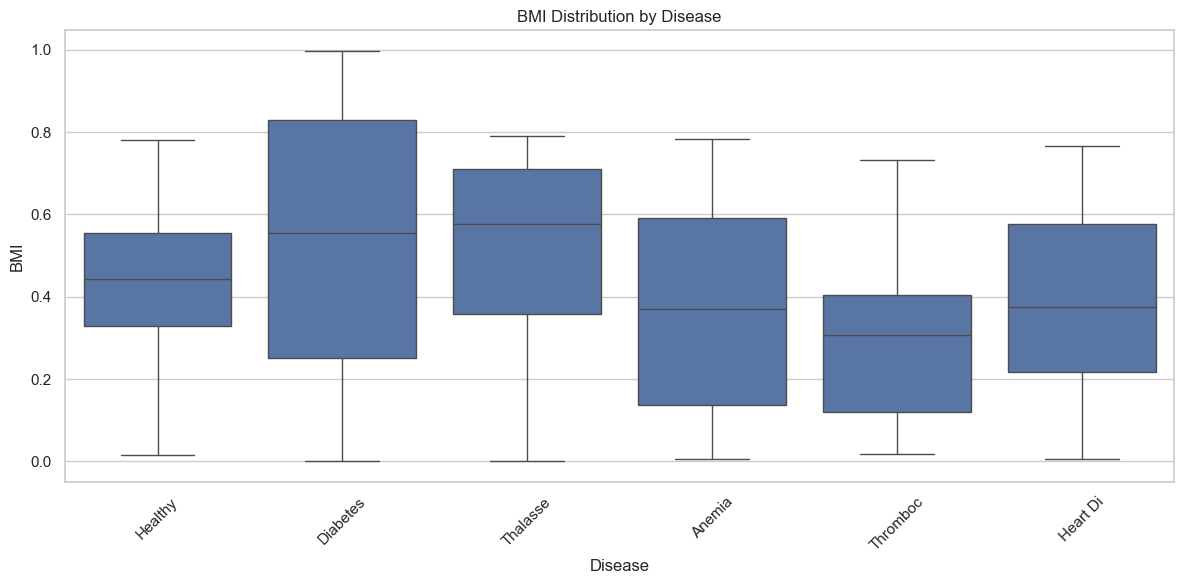

In [58]:
## 16. Statistical Tests Between Disease Groups

# Function to perform ANOVA between disease groups for a given feature
def perform_anova(feature):
    # Create lists to store data for each disease
    groups = []
    disease_types = all_data['Disease'].unique()
    
    for disease in disease_types:
        groups.append(all_data[all_data['Disease'] == disease][feature].values)
    
    # Perform ANOVA
    f_stat, p_value = stats.f_oneway(*groups)
    
    return {
        'Feature': feature,
        'F-statistic': f_stat,
        'p-value': p_value,
        'Significant': 'Yes' if p_value < 0.05 else 'No'
    }

# Perform ANOVA for each numerical feature
anova_results = []
for feature in all_data.select_dtypes(include=['float64', 'int64']).columns:
    result = perform_anova(feature)
    anova_results.append(result)

# Create DataFrame with results
anova_df = pd.DataFrame(anova_results)
anova_df = anova_df.sort_values('p-value')

print("ANOVA results (comparing feature means across disease groups):")
print(anova_df)

# Plot features with significant differences
significant_features = anova_df[anova_df['Significant'] == 'Yes']['Feature'].tolist()
for feature in significant_features[:10]:  # Limit to first 10 to avoid too many plots
    plot_feature_by_disease(feature)

In [ ]:
def compare_feature_distributions(train_df, test_df, feature):
    """
    Perform t-test between train and test distributions for a given feature
    """
    # Statistical testing (Welch's t-test)
    t_stat, p_value = stats.ttest_ind(
        train_df[feature].dropna(), 
        test_df[feature].dropna(),
        equal_var=False  # Welch's t-test (doesn't assume equal variances)
    )
    
    # Effect size calculation (Cohen's d)
    train_mean = train_df[feature].mean()
    test_mean = test_df[feature].mean()
    pooled_std = np.sqrt((train_df[feature].var() + test_df[feature].var()) / 2)
    effect_size = abs(train_mean - test_mean) / pooled_std if pooled_std != 0 else 0
    
    return {
        'Feature': feature,
        'T-statistic': t_stat,
        'P-value': p_value,
        'Effect Size': effect_size,
        'Significant': 'Yes' if p_value < 0.05 else 'No'
    }

# Chi-square test for categorical distribution
def compare_disease_distributions(train_df, test_df, category_col='Disease'):
    """
    Perform chi-square test between train and test distributions for categorical variable
    """
    # Get counts
    train_counts = train_df[category_col].value_counts()
    test_counts = test_df[category_col].value_counts()
    
    # Align the counts (ensure both have the same categories)
    all_categories = list(set(train_counts.index) | set(test_counts.index))
    train_counts_aligned = pd.Series([train_counts.get(cat, 0) for cat in all_categories], index=all_categories)
    test_counts_aligned = pd.Series([test_counts.get(cat, 0) for cat in all_categories], index=all_categories)
    
    # Perform chi-square test
    chi2, p_value, _, _ = stats.chi2_contingency([train_counts_aligned.values, test_counts_aligned.values])
    
    return {
        'Chi-square': chi2,
        'P-value': p_value,
        'Significant': 'Yes' if p_value < 0.05 else 'No'
    }


numerical_features = train_data.select_dtypes(include=['float64', 'int64']).columns
feature_results = [compare_feature_distributions(train_data, test_data, feature) for feature in numerical_features]
disease_result = compare_disease_distributions(train_data, test_data)

In [78]:
# T-test for numerical features
def compare_feature_distributions(train_df, test_df, feature):
    """
    Perform t-test between train and test distributions for a given feature
    """
    # Statistical testing (Welch's t-test)
    t_stat, p_value = stats.ttest_ind(
        train_df[feature].dropna(), 
        test_df[feature].dropna(),
        equal_var=False  # Welch's t-test (doesn't assume equal variances)
    )
    
    # Get means and differences
    train_mean = train_df[feature].mean()
    test_mean = test_df[feature].mean()
    mean_diff = abs(train_mean - test_mean)
    
    # Effect size calculation (Cohen's d)
    pooled_std = np.sqrt((train_df[feature].var() + test_df[feature].var()) / 2)
    effect_size = mean_diff / pooled_std if pooled_std != 0 else 0
    
    return {
        'Feature': feature,
        'Train Mean': train_mean,
        'Test Mean': test_mean,
        'Mean Diff': mean_diff,
        'T-statistic': t_stat,
        'P-value': p_value,
        'Effect Size': effect_size,
        'Significant': 'Yes' if p_value < 0.05 else 'No'
    }

# Chi-square test for categorical distribution
def compare_disease_distributions(train_df, test_df, category_col='Disease'):
    """
    Perform chi-square test between train and test distributions for categorical variable
    """
    # Get counts
    train_counts = train_df[category_col].value_counts()
    test_counts = test_df[category_col].value_counts()
    
    # Align the counts (ensure both have the same categories)
    all_categories = list(set(train_counts.index) | set(test_counts.index))
    train_counts_aligned = pd.Series([train_counts.get(cat, 0) for cat in all_categories], index=all_categories)
    test_counts_aligned = pd.Series([test_counts.get(cat, 0) for cat in all_categories], index=all_categories)
    
    # Perform chi-square test
    chi2, p_value, _, _ = stats.chi2_contingency([train_counts_aligned.values, test_counts_aligned.values])
    
    return {
        'Chi-square': chi2,
        'P-value': p_value,
        'Significant': 'Yes' if p_value < 0.05 else 'No'
    }

# Example usage:
numerical_features = train_data.select_dtypes(include=['float64', 'int64']).columns
feature_results = [compare_feature_distributions(train_data, test_data, feature) for feature in numerical_features]
disease_result = compare_disease_distributions(train_data, test_data)


# Display and visualization function
def display_results(feature_results, disease_result):
    """
    Print statistical test results in a simple, readable format.
    """
    print("\n===== Train-Test Distribution Shift Analysis =====\n")
    
    # Feature-wise T-test results
    print("### Numerical Feature Comparison (T-test) ###")
    print(f"{'Feature':<20}{'Train Mean':<15}{'Test Mean':<15}{'Mean Diff':<15}{'T-stat':<12}{'P-value':<12}{'Effect Size':<12}{'Significant':<12}")
    print("-" * 110)
    
    for result in feature_results:
        print(f"{result['Feature']:<20}{result['Train Mean']:<15.4f}{result['Test Mean']:<15.4f}{result['Mean Diff']:<15.4f}{result['T-statistic']:<12.4f}{result['P-value']:<12.6f}{result['Effect Size']:<12.4f}{result['Significant']:<12}")

    print("\n### Categorical Feature Comparison (Chi-square Test) ###")
    print(f"{'Chi-square':<12}{'P-value':<12}{'Significant':<12}")
    print("-" * 36)
    print(f"{disease_result['Chi-square']:<12.4f}{disease_result['P-value']:<12.6f}{disease_result['Significant']:<12}")

# Call the function
display_results(feature_results, disease_result)
    


===== Train-Test Distribution Shift Analysis =====

### Numerical Feature Comparison (T-test) ###
Feature             Train Mean     Test Mean      Mean Diff      T-stat      P-value     Effect Size Significant 
--------------------------------------------------------------------------------------------------------------
Glucose             0.3628         0.4900         0.1272         -9.1530     0.000000    0.4738      Yes         
Cholesterol         0.3936         0.5068         0.1131         -8.2297     0.000000    0.4318      Yes         
Hemoglobin          0.5862         0.4855         0.1007         6.8655      0.000000    0.3527      Yes         
Platelets           0.5040         0.5281         0.0241         -1.6430     0.100816    0.0809      No          
White Blood Cells   0.5111         0.5098         0.0013         0.0906      0.927820    0.0046      No          
Red Blood Cells     0.5066         0.5043         0.0022         0.1516      0.879587    0.0079      No   